**IMPORT** **LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install skimpy
import skimpy as sk
import scipy.stats as stats
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import scale

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


**EXPLORATORY DATA ANALYSIS (EDA)**

In [2]:
#Reading in the data and checking the data head
df_Electricity = pd.read_excel("/content/Ikeja_Electric_dataset.xlsx")
df_Electricity.head()

Source.Name     BU  NewBU          UT          SC  Account No.  \
0  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    100336966   
1  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    100068288   
2  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    101502229   
3  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    100337064   
4  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    101258601   

                 Customer Name  \
0        CHRISTOPHER GEOGHEGAN   
1                  ZENITH BANK   
2          SOYEGE IDOWU LUKMAN   
3                MR JIWA AKRAN   
4  SHODIPE OLUMUYIWA AKINTUNDE   

                                    Service Address Tariff Account Status  \
0  1 A.ABBA JOHNSON CRESC. OFF ADENIYI JONES LAGOS.  A-MD2         Active   
1          65 B ADENIYI JONES ANIFOWOSE LAGOS STATE  A-MD2         Active   
2            1, OBANTA STREET, OFF AJAO ROAD, IKEJA  B-MD2         Active   
3                               1 AJAO ROAD IKEJA.   B-MD2         Active   
4    28, PADE ODAYE CLOSE, OFF ADENIYI JONES, IKEJA  A-MD2         Active   

   ... TOT POP SUS POP SUS & ACTIVE ACTIVE MONTHS  CURRENT ACTIVE MONTH  \
0  ...       1       0            1            14                    15   
1  ...       1       0            1            14                    15   
2  ...       1       0            1            14                    15   
3  ...       1       0            1             1                     2   
4  ...       1       0            1            14                    15   

   ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)  \
0                                         1   
1                                         0   
2                                         1   
3                                         5   
4                                         0   

   CURRENT NUM MONTHS NO PAYMENT CHECK  CATEGORY    CE O/S  PAYMENT PATTERN  
0                                     1       OK     23.43     FULL PAYMENT  
1                                     0       OK      0.00     FULL PAYMENT  
2                                     1       OK    493.88     FULL PAYMENT  
3                                     5       OK  10109.97     FULL PAYMENT  
4                                     0       OK      0.00     FULL PAYMENT  

[5 rows x 44 columns]

In [3]:
#checking the tail of the dataframe
df_Electricity.tail(2)

Source.Name     BU  NewBU   UT   SC  Account No.  \
66534  2023-01-01  IKEJA  IKEJA  PTC  PTC    102330476   
66535  2023-01-01  IKEJA  IKEJA  PTC  PTC    102656813   

                    Customer Name                       Service Address  \
66534              OLUMIDE DANIEL  9 ALADE AVENUE OFF AWOLOWO WAY IKEJA   
66535  OLUBIYI ADEDOYIN SANGOWAWA         6 REVD OGUNBIYI STR IKEJA GRA   

            Tariff Account Status  ... TOT POP SUS POP SUS & ACTIVE  \
66534     A-Non MD         Active  ...       1       0            1   
66535  A-Bilateral         Active  ...       1       0            1   

      ACTIVE MONTHS  CURRENT ACTIVE MONTH  \
66534             0                     1   
66535             0                     1   

       ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)  \
66534                                         1   
66535                                         1   

       CURRENT NUM MONTHS NO PAYMENT CHECK  CATEGORY  CE O/S  PAYMENT PATTERN  
66534                                     1       OK     0.0     FULL PAYMENT  
66535                                     1       OK     0.0  PARTIAL PAYMENT  

[2 rows x 44 columns]

**UNDERSTANDING THE DATA AND THE STRUCTURE**

** DATA FEATURES: **

**Source.Name:** This contains the **date column** that contains the month of each customer transcation.

**BU:** This is **non-numerical column** that contains the **business unt**.

**NewBU:** This is **non-numerical column** that contains the **business unit**.

**UT:** This is **non-numerical column** that contains the **business locations.**

**SC:** This is a **non-numerical column** that contains the **business locations**.

**Account No.:** **Numerical Column** that stores **unique customer identification number**

**Customer Name:** This is a **categorical column** that stores the **customer name**

**Service Address:** ** This is a **Numerical Column** that contains the **customer address**

**Tariff :** This is a categorical column that stores Customers hourly supply as letters (A,B,C,D), customers consumption category as letters (MD:Maximum Demand, NMD: Nom-Maximum Demand, Prime and Bilateral) and level consumption as number (1, 2 like MD1 and MD2) .

**Account Status:** This is a non-numerical column that stores customers who are connected to supply as **"ACTIVE"** and customer who are not connected as **"Suspended"**

**Account Type:** This is **non-Numerical Column** that stores the **customer account type based on consuption** eg: MD and NMD

**Account Type 2:** This is **non-Numerical Column** that stores the **customer account type based on consuption** eg: MD, NMD, MD-KAM and PRIME

**Set up date:** This a numerical column that store the date account was setup

**meter reading code(R,E,D)	:** This a non-numerical column that store code that tell if a customer consumption was captured for billing.eg R:READ, E: ESTIMATE and D: Don't read.

**Demand(kVA):** This a numerical column that store the capacity of power transformers in customer location.

**Current Reading:** This a numerical column that store customers current reading

**Previous Reading:** This a numerical column that store customers previous reading

**Read Date:** This contains the **date column** that contains the date a customer reading was last read

**Current Opening bal.:**	This is a numerical column that store customers balance brought forward

**Current Billing Adjustment:**	This is a numerical column that store customers adjustment on bill

**Current Payment:** This is a numerical column that store customers payment

**Energy (kWh):**	This is a numerical column that store customers energy consumed

**Fixed Charge(₦):**	This is a numerical column that store customers energy consumed

**Vat charge (₦):**	This is a numerical column that store customers VAT charge

**Actual Current Bill:** This a numerical column that store customers current bill amount

**Current Closing bal.:**	This is a numerical column that store customers closing balance

**Actual Closing bal.:**	This is a numerical column that store customers closing balance

**Feeder No:** **Numerical Column** that stores **unique number for customers feeder or source of supply**

**DT NO:** **Numerical Column** that stores **unique number for customers distribution transformer**

**FINAL STAFF ID:**	**Numerical Column** that stores **staff ID **

**ESR NAME (NEW):**	**NON-Numerical Column** that stores **staff name**

**ESS:**	**NON-Numerical Column** that stores **staff name**

**DT Name:**	**Numerical Column** that stores **unique number for customers distribution transformer name**

**CURRENT ACTIVE MONTH:** **Numerical Column** that stores **unique number of months customer is active**

**ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT):** **Numerical Column** that stores **no of times customer have missed payment in one year**

**CURRENT NUM MONTHS NO PAYMENT CHECK:** **Numerical Column** that stores **current number of times customer have missed payment in one year**

**CE O/S:**	**Numerical Column** that stores **customers collection from outstanding**

In [4]:
#Account status divides the customers into two .
#1) Active Customers: Customers who are currently connected to supply.
#2) Suspended Customers: are customer who are not connected to supply. maybe they left or disconnected due to non-payment
df_Electricity['Account Status'].value_counts()

Account Status
Suspended    42067
Active       24469
Name: count, dtype: int64

**Account status** divides the customers into two .
1) **Active Customers:** Customers who are currently connected to supply.
2) **Suspended Customers**: are customer who are not connected to supply. Maybe they left or disconnected due to non-payment
We have **42067 suspended accounts** and **24469 Active accounts**.

#We will be working with only active customers. Suspended customers are not connected to the electricity grid. They are under our jurisdiction but they use other forms of power like their personal generators or solar panels or disconnected by the company for non payment.
#We do not know the reason for them be suspended as it is not on the platform we got the data from

In [5]:
#Using the active customers as that reflects the current exisiting customers
df_Electricity_Active = df_Electricity[df_Electricity['Account Status'] == "Active"]
df_Electricity_Suspended = df_Electricity[df_Electricity['Account Status'] == "Suspended"]

<ipython-input-6-10dd57a18894>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Source.Name', y='Energy (kWh)', data=df_Electricity_Active, ci=None)  # Changed y to column name
<ipython-input-6-10dd57a18894>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Source.Name', y='Energy (kWh)', data=df_Electricity_Suspended, ci=None)  # Changed y to column name


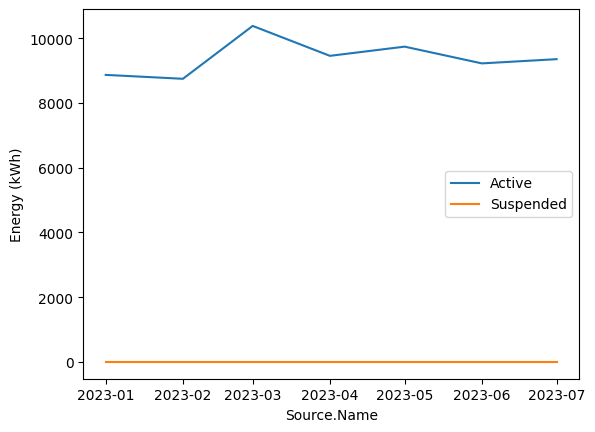

In [6]:
# Assuming 'Consumption' is the column you want to plot for y-axis
sns.lineplot(x='Source.Name', y='Energy (kWh)', data=df_Electricity_Active, ci=None)  # Changed y to column name
sns.lineplot(x='Source.Name', y='Energy (kWh)', data=df_Electricity_Suspended, ci=None)  # Changed y to column name

plt.legend(["Active", 'Suspended'])  # Updated legend to reflect the data
plt.show()

**The plot above shows that customers that are suspended do not record any consumption**
Hence, they are not connected to supply

In [7]:
df_Electricity_Active.head(2)

Source.Name     BU  NewBU          UT          SC  Account No.  \
0  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    100336966   
1  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    100068288   

           Customer Name                                   Service Address  \
0  CHRISTOPHER GEOGHEGAN  1 A.ABBA JOHNSON CRESC. OFF ADENIYI JONES LAGOS.   
1            ZENITH BANK          65 B ADENIYI JONES ANIFOWOSE LAGOS STATE   

  Tariff Account Status  ... TOT POP SUS POP SUS & ACTIVE ACTIVE MONTHS  \
0  A-MD2         Active  ...       1       0            1            14   
1  A-MD2         Active  ...       1       0            1            14   

   CURRENT ACTIVE MONTH  ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)  \
0                    15                                         1   
1                    15                                         0   

   CURRENT NUM MONTHS NO PAYMENT CHECK  CATEGORY  CE O/S  PAYMENT PATTERN  
0                                     1       OK   23.43     FULL PAYMENT  
1                                     0       OK    0.00     FULL PAYMENT  

[2 rows x 44 columns]

In [8]:
df_Electricity_Active.shape

(24469, 44)

The shape of are data is **24469 observations **and **44 features**

In [9]:
df_Electricity_Active.columns

Index(['Source.Name', 'BU', 'NewBU', 'UT', 'SC', 'Account No.',
       'Customer Name', 'Service Address', 'Tariff', 'Account Status',
       'Account Type', 'Account Type 2', 'Set up date',
       'meter reading code(R,E,D)', 'Demand(kVA)', 'Current Reading',
       'Previous Reading', 'Read Date', 'Current Opening bal.',
       'Current Billing Adjustment', 'Current Payment', 'Energy (kWh)',
       'Fixed Charge(₦)', 'Vat charge (₦)', 'Current Bill',
       'Actual Current Bill', 'Current Closing bal.', 'Actual Closing bal.',
       'Feeder No', 'DT NO', 'FINAL STAFF ID ', 'ESR NAME (NEW)', 'ESS',
       'DT Name', 'TOT POP', 'SUS POP', 'SUS & ACTIVE', 'ACTIVE MONTHS',
       'CURRENT ACTIVE MONTH', 'ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)',
       'CURRENT NUM MONTHS NO PAYMENT CHECK ', 'CATEGORY', 'CE O/S',
       'PAYMENT PATTERN'],
      dtype='object')

In [10]:
df_Electricity_Active.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24469 entries, 0 to 66535
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Source.Name                               24469 non-null  datetime64[ns]
 1   BU                                        24469 non-null  object        
 2   NewBU                                     24469 non-null  object        
 3   UT                                        24469 non-null  object        
 4   SC                                        24469 non-null  object        
 5   Account No.                               24469 non-null  int64         
 6   Customer Name                             24469 non-null  object        
 7   Service Address                           24451 non-null  object        
 8   Tariff                                    24469 non-null  object        
 9   Account Status                   

In [11]:
df_Electricity_Active.isnull().sum()

Source.Name                                    0
BU                                             0
NewBU                                          0
UT                                             0
SC                                             0
Account No.                                    0
Customer Name                                  0
Service Address                               18
Tariff                                         0
Account Status                                 0
Account Type                                   0
Account Type 2                                 0
Set up date                                    0
meter reading code(R,E,D)                      0
Demand(kVA)                                  650
Current Reading                             2103
Previous Reading                            2103
Read Date                                   2103
Current Opening bal.                           0
Current Billing Adjustment                     0
Current Payment                                0
Energy (kWh)                                   0
Fixed Charge(₦)                                0
Vat charge (₦)                                 0
Current Bill                                   0
Actual Current Bill                            0
Current Closing bal.                           0
Actual Closing bal.                          227
Feeder No                                      7
DT NO                                          2
FINAL STAFF ID                              9607
ESR NAME (NEW)                              9607
ESS                                         9584
DT Name                                       12
TOT POP                                        0
SUS POP                                        0
SUS & ACTIVE                                   0
ACTIVE MONTHS                                  0
CURRENT ACTIVE MONTH                           0
ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)       0
CURRENT NUM MONTHS NO PAYMENT CHECK            0
CATEGORY                                       0
CE O/S                                         0
PAYMENT PATTERN                                0
dtype: int64

In [12]:
#% null value
(df_Electricity_Active.isnull().sum()/(len(df_Electricity_Active)))*100

Source.Name                                  0.000000
BU                                           0.000000
NewBU                                        0.000000
UT                                           0.000000
SC                                           0.000000
Account No.                                  0.000000
Customer Name                                0.000000
Service Address                              0.073562
Tariff                                       0.000000
Account Status                               0.000000
Account Type                                 0.000000
Account Type 2                               0.000000
Set up date                                  0.000000
meter reading code(R,E,D)                    0.000000
Demand(kVA)                                  2.656422
Current Reading                              8.594548
Previous Reading                             8.594548
Read Date                                    8.594548
Current Opening bal.                         0.000000
Current Billing Adjustment                   0.000000
Current Payment                              0.000000
Energy (kWh)                                 0.000000
Fixed Charge(₦)                              0.000000
Vat charge (₦)                               0.000000
Current Bill                                 0.000000
Actual Current Bill                          0.000000
Current Closing bal.                         0.000000
Actual Closing bal.                          0.927704
Feeder No                                    0.028608
DT NO                                        0.008174
FINAL STAFF ID                              39.261923
ESR NAME (NEW)                              39.261923
ESS                                         39.167927
DT Name                                      0.049042
TOT POP                                      0.000000
SUS POP                                      0.000000
SUS & ACTIVE                                 0.000000
ACTIVE MONTHS                                0.000000
CURRENT ACTIVE MONTH                         0.000000
ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)     0.000000
CURRENT NUM MONTHS NO PAYMENT CHECK          0.000000
CATEGORY                                     0.000000
CE O/S                                       0.000000
PAYMENT PATTERN                              0.000000
dtype: float64

Exploring the reasons for the null:
1. **Service Address** : Missing addresses which is due wrong kyc capturing and
system migration
2. **Demand(kVA)** : Missing addresses which is due wrong kyc capturing and
system migration
3. **Previous Reading**, **Previous Reading**, and **Read Date** : Due to faulty meter and meter tampering they were not recorded.
4. **FINAL STAFF ID**, **ESR NAME**, AND **(NEW) ESS** : The missing values are for transformers that are not assigned to any ESR (ESRs are Sales representatives) like MD CUSTOMERS
5. **Feeder No, DT NO**  are assest numbers with names henece no DT number.
6. **DT Name is the name of an asset

These records are not important to the analysis we are about to carry out

In [13]:
#Exploring reason for null value in 'Actual Closing bal.'
#current closing balance is Customers Current bill + Current Opening bal..
#Actual Closing balance is 0 for negative balance (Customer with negative outstanding balance or not owing) and value of current closing if greater than or equal to zero
df_Electricity_Active['Actual Closing bal.'].isnull().value_counts()

Actual Closing bal.
False    24242
True       227
Name: count, dtype: int64

In [14]:
#filtering the dataframe where 'Actual Closing bal.'== null
df_Electricity_Active_null = df_Electricity_Active[df_Electricity_Active['Actual Closing bal.'].isnull()==True]
df_Electricity_Active_null.head(5)

Source.Name     BU  NewBU          UT          SC  Account No.  \
43   2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    100068126   
168  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    101242609   
173  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    101699628   
225  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    102614531   
228  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    102237657   

                   Customer Name                       Service Address  \
43                    TONY OKIRO    7. AWOLOWO WAY. IKEJA LAGOS STATE    
168            BISHOP EDAFE MIKE                     50 OBA AKRAN ROAD   
173  OGUNYEMI OLATOKUNBO AYODEJI        61 ABBA JOHNSON CRESCENT IKEJA   
225               FUNBI BAMIDELE  10, ARAROMI STREET, ANIFOWOSHE,IKEJA   
228           P. W. NIG. LIMITED      BUNGALOW 4 OBANTA AVE  IKEJA.      

       Tariff Account Status  ... TOT POP SUS POP SUS & ACTIVE ACTIVE MONTHS  \
43      B-MD2         Active  ...       1       0            1            14   
168  A-Non MD         Active  ...       1       0            1            14   
173     A-MD1         Active  ...       1       0            1            14   
225     B-MD2         Active  ...       1       0            1             5   
228  B-Non MD         Active  ...       1       0            1             5   

     CURRENT ACTIVE MONTH  ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)  \
43                     15                                         3   
168                    15                                         4   
173                    15                                         4   
225                     6                                        11   
228                     6                                        12   

     CURRENT NUM MONTHS NO PAYMENT CHECK     CATEGORY    CE O/S  \
43                                      3          OK   1099.73   
168                                     4          OK     34.89   
173                                     5          OK      0.00   
225                                    11          OK      0.00   
228                                    12  CATEGORY 0  11380.30   

     PAYMENT PATTERN  
43      FULL PAYMENT  
168     FULL PAYMENT  
173  PARTIAL PAYMENT  
225  PARTIAL PAYMENT  
228     FULL PAYMENT  

[5 rows x 44 columns]

In [15]:
#creating a dataframe with features that better explains the reason for the null seen in 'Actual Closing bal.'
df_Electricity_Active_null_Mnth = pd.DataFrame(df_Electricity_Active_null.loc[:,['Actual Closing bal.','CURRENT ACTIVE MONTH','Actual Current Bill','Account Type 2','Current Closing bal.','Current Bill','Current Opening bal.','Current Billing Adjustment']],columns=['Actual Closing bal.','CURRENT ACTIVE MONTH','Actual Current Bill','Account Type 2','Current Closing bal.','Current Bill','Current Opening bal.','Current Billing Adjustment'])
df_Electricity_Active_null_Mnth

Actual Closing bal.  CURRENT ACTIVE MONTH  Actual Current Bill  \
43                     NaN                    15             98900.27   
168                    NaN                    15             87065.11   
173                    NaN                    15            155208.50   
225                    NaN                     6              3074.23   
228                    NaN                     6              6716.60   
...                    ...                   ...                  ...   
64992                  NaN                    12            377525.23   
65072                  NaN                     9           3725177.29   
65153                  NaN                    12             73751.30   
65906                  NaN                    12            103502.81   
65907                  NaN                    12              8597.25   

      Account Type 2  Current Closing bal.  Current Bill  \
43                MD             -61145.45      98900.27   
168              NMD            -448265.85      87065.11   
173              NMD            -172578.04     155208.50   
225               MD               -524.45       3074.23   
228              NMD              -1333.66       6716.60   
...              ...                   ...           ...   
64992             MD           -1353249.96     377525.23   
65072             MD            -505573.05    3725177.29   
65153             MD           -1228803.36      73751.30   
65906            NMD             -54736.86     103502.81   
65907            NMD            -153450.65       8597.25   

       Current Opening bal.  Current Billing Adjustment  
43                 29954.28                         0.0  
168              -448230.96                         0.0  
173              -327786.54                         0.0  
225                -3598.68                         0.0  
228                10045.74                         0.0  
...                     ...                         ...  
64992           -1328785.17                         0.0  
65072            4230750.34                         0.0  
65153           -1302554.66                         0.0  
65906             -58239.67                         0.0  
65907            -142047.90                         0.0  

[227 rows x 8 columns]

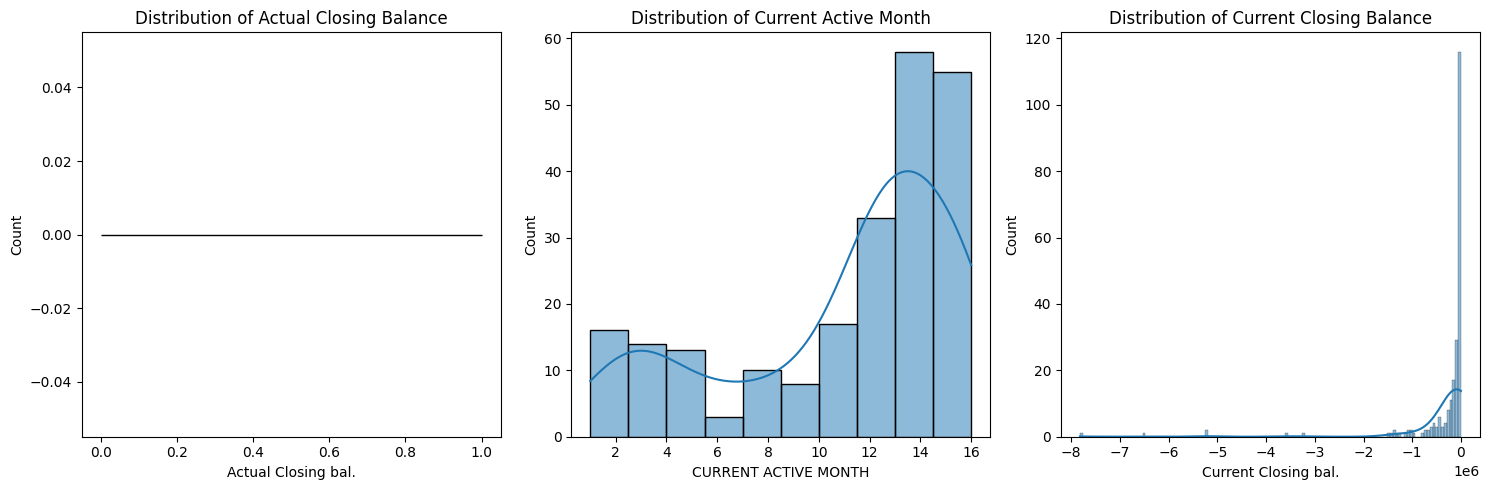

In [16]:
#Creating a distribution plot of 'Actual Closing balance', 'Current Active Month' and 'Current Closing Bal
#Customers with null values are customers from 0 to negative value in the closing balance (that is: they are on credit or not owing the organisation)
plt.figure(figsize=(15, 5))

# Plot 'Actual Closing bal.'
plt.subplot(1, 3, 1)
sns.histplot(df_Electricity_Active_null_Mnth['Actual Closing bal.'], kde=True)
plt.title('Distribution of Actual Closing Balance')

# Plot 'CURRENT ACTIVE MONTH'
plt.subplot(1, 3, 2)
sns.histplot(df_Electricity_Active_null_Mnth['CURRENT ACTIVE MONTH'], kde=True)
plt.title('Distribution of Current Active Month')

# Plot 'Current Closing bal.'
plt.subplot(1, 3, 3)
sns.histplot(df_Electricity_Active_null_Mnth['Current Closing bal.'], kde=True)
plt.title('Distribution of Current Closing Balance')

plt.tight_layout()
plt.show()

#The customers do not have any outstanding payments which is why there is null data. They can be replaced with zero as the business owes them
##Customers with null values are customers that records from 0 to negative value in the closing balance (that is: they are on credit or not owing the organisation)

In [17]:
#Replacing NaN in Actual closing balance column with 0 (as it also represents no payment)
df_Electricity_Active['Actual Closing bal.'].fillna(0, inplace=True)
df_Electricity_Active['Feeder No'].fillna(0, inplace=True)
df_Electricity_Active.isnull().sum()

<ipython-input-17-5f4a16609443>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Electricity_Active['Actual Closing bal.'].fillna(0, inplace=True)
<ipython-input-17-5f4a16609443>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Electricity_Active['Feeder No'].fillna(0, inplace=True)


Source.Name                                    0
BU                                             0
NewBU                                          0
UT                                             0
SC                                             0
Account No.                                    0
Customer Name                                  0
Service Address                               18
Tariff                                         0
Account Status                                 0
Account Type                                   0
Account Type 2                                 0
Set up date                                    0
meter reading code(R,E,D)                      0
Demand(kVA)                                  650
Current Reading                             2103
Previous Reading                            2103
Read Date                                   2103
Current Opening bal.                           0
Current Billing Adjustment                     0
Current Payment                                0
Energy (kWh)                                   0
Fixed Charge(₦)                                0
Vat charge (₦)                                 0
Current Bill                                   0
Actual Current Bill                            0
Current Closing bal.                           0
Actual Closing bal.                            0
Feeder No                                      0
DT NO                                          2
FINAL STAFF ID                              9607
ESR NAME (NEW)                              9607
ESS                                         9584
DT Name                                       12
TOT POP                                        0
SUS POP                                        0
SUS & ACTIVE                                   0
ACTIVE MONTHS                                  0
CURRENT ACTIVE MONTH                           0
ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)       0
CURRENT NUM MONTHS NO PAYMENT CHECK            0
CATEGORY                                       0
CE O/S                                         0
PAYMENT PATTERN                                0
dtype: int64

In [18]:
df_Electricity_Active.head(2)

Source.Name     BU  NewBU          UT          SC  Account No.  \
0  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    100336966   
1  2023-04-01  IKEJA  IKEJA  ANIFOWOSHE  ANIFOWOSHE    100068288   

           Customer Name                                   Service Address  \
0  CHRISTOPHER GEOGHEGAN  1 A.ABBA JOHNSON CRESC. OFF ADENIYI JONES LAGOS.   
1            ZENITH BANK          65 B ADENIYI JONES ANIFOWOSE LAGOS STATE   

  Tariff Account Status  ... TOT POP SUS POP SUS & ACTIVE ACTIVE MONTHS  \
0  A-MD2         Active  ...       1       0            1            14   
1  A-MD2         Active  ...       1       0            1            14   

   CURRENT ACTIVE MONTH  ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)  \
0                    15                                         1   
1                    15                                         0   

   CURRENT NUM MONTHS NO PAYMENT CHECK  CATEGORY  CE O/S  PAYMENT PATTERN  
0                                     1       OK   23.43     FULL PAYMENT  
1                                     0       OK    0.00     FULL PAYMENT  

[2 rows x 44 columns]

In [19]:
df_Electricity_Active.shape

(24469, 44)

In [20]:
df_Electricity_Active['Source.Name'].value_counts()

Source.Name
2023-01-01    3666
2023-05-01    3587
2023-07-01    3537
2023-02-01    3501
2023-06-01    3439
2023-04-01    3414
2023-03-01    3325
Name: count, dtype: int64

In [21]:
#checking Unique in the dataframe. This data is a historical customer data for seven months in 2023(ie January 2023 - July 2023). as seen source name above
#Consquently there are duplcates accross the features (even with payment: customer can pay thesame amount over time(months). even outstanding )
df_Electricity_Active.nunique()

Source.Name                                     7
BU                                              1
NewBU                                           2
UT                                              8
SC                                              8
Account No.                                  5608
Customer Name                                5066
Service Address                              5179
Tariff                                         14
Account Status                                  1
Account Type                                    2
Account Type 2                                  4
Set up date                                   639
meter reading code(R,E,D)                       3
Demand(kVA)                                     1
Current Reading                              3380
Previous Reading                             3341
Read Date                                      14
Current Opening bal.                        21287
Current Billing Adjustment                    428
Current Payment                             11064
Energy (kWh)                                 9681
Fixed Charge(₦)                                 1
Vat charge (₦)                              12949
Current Bill                                12977
Actual Current Bill                         13060
Current Closing bal.                        22169
Actual Closing bal.                         21817
Feeder No                                      72
DT NO                                        2280
FINAL STAFF ID                                 57
ESR NAME (NEW)                                 78
ESS                                            17
DT Name                                      2333
TOT POP                                         1
SUS POP                                         1
SUS & ACTIVE                                    1
ACTIVE MONTHS                                  18
CURRENT ACTIVE MONTH                           18
ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)       19
CURRENT NUM MONTHS NO PAYMENT CHECK            21
CATEGORY                                        4
CE O/S                                       4874
PAYMENT PATTERN                                 2
dtype: int64

#Checking Unique in the dataframe. This data is a historical customer data for seven months in 2023(i.e. January 2023 - July 2023). as seen source name above
#Consquently there are duplcates accross the features (even with payment: customer can pay thesame amount over time(months). even outstanding )

In [22]:
#Account type 2 gives an understanding of the customer types based on their consumption
df_Electricity_Active['Account Type 2'].value_counts()

Account Type 2
NMD       11394
MD         9924
MD-KAM     2218
PRIME       933
Name: count, dtype: int64

#We have
# 11394 NMD customers, 9924  MD customers, 2218 MD-KAM, and 933 PRIME customers.

#NMD customers are majorly residential customers
#MD customers are corporations like Banks and manufacturing plants
#MD-KAM are large conglomerates and the organisation run by government
#Prime are SMEs

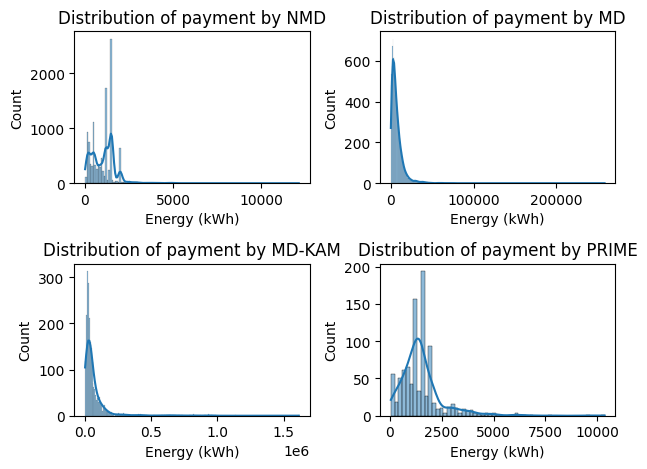

In [23]:
#ploting  distribution chart of 'Consumption' by 'Account Type 2' for each 'Account Type 2'
plt.subplot(2, 2, 1)
# Use square brackets for filtering the DataFrame
sns.histplot(df_Electricity_Active[df_Electricity_Active['Account Type 2']=='NMD']['Energy (kWh)'], kde=True)
plt.title(f"Distribution of payment by NMD")

plt.subplot(2, 2, 2)
# Use square brackets for filtering the DataFrame
sns.histplot(df_Electricity_Active[df_Electricity_Active['Account Type 2']=='MD']['Energy (kWh)'], kde=True)
plt.title(f"Distribution of payment by MD")

plt.subplot(2, 2, 3)  # Use comma to separate arguments
# Use square brackets for filtering the DataFrame
sns.histplot(df_Electricity_Active[df_Electricity_Active['Account Type 2']=='MD-KAM']['Energy (kWh)'], kde=True)
plt.title(f"Distribution of payment by MD-KAM")

plt.subplot(2, 2, 4)
# Use square brackets for filtering the DataFrame
sns.histplot(df_Electricity_Active[df_Electricity_Active['Account Type 2']=='PRIME']['Energy (kWh)'], kde=True)
plt.title(f"Distribution of payment by PRIME")

plt.tight_layout()
plt.show()

In [24]:
df_Electricity_Active['Account Type 2'].value_counts()

Account Type 2
NMD       11394
MD         9924
MD-KAM     2218
PRIME       933
Name: count, dtype: int64

**A plot of payment across account type 2 over time while help see attitude to payment. MD-KAM appears to have a better attitude to payment. This is driven by better supply and service**

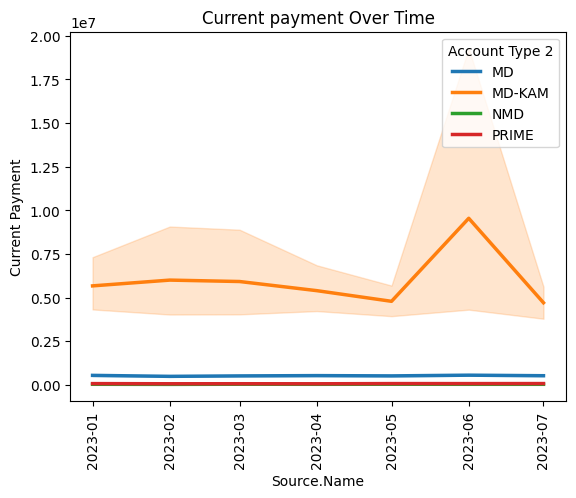

In [25]:
sns.lineplot(x="Source.Name", y='Current Payment', hue="Account Type 2",
             linewidth=2.5, markers=True, dashes=False, data=df_Electricity_Active)  # Removed 'style' argument
plt.xticks(rotation=90)
plt.title('Current payment Over Time')
plt.show()

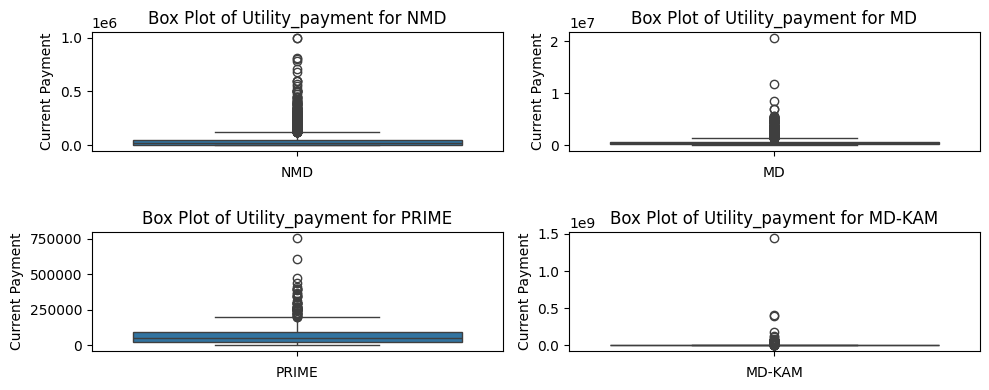

In [26]:
#viewing box plot shows that there are outliers accross the three different account type category which is necessary
#as it reflects the actual payment that is not within the interquatile Range(IQR) data group,Lower quartile group and upper quartile group.
#The variation in consumption also give rise to the variation in payment. hence giving rise to outliers as seen below
plt.figure(figsize=(10, 4))

plt.subplot(2, 2, 1)
sns.boxplot(data=df_Electricity_Active[df_Electricity_Active['Account Type 2'] == 'NMD'], y='Current Payment') # Filter data for 'NMD' within the plot call
plt.title('Box Plot of Utility_payment for NMD')
plt.xlabel('NMD')
plt.ylabel('Current Payment')

plt.subplot(2, 2, 2)
sns.boxplot(data=df_Electricity_Active[df_Electricity_Active['Account Type 2'] == 'MD'], y='Current Payment') # Filter data for 'MD' within the plot call
plt.title('Box Plot of Utility_payment for MD')
plt.xlabel('MD')
plt.ylabel('Current Payment')

plt.subplot(2, 2, 3)
sns.boxplot(data=df_Electricity_Active[df_Electricity_Active['Account Type 2'] == 'PRIME'], y='Current Payment') # Filter data for 'PRIME' within the plot call
plt.title('Box Plot of Utility_payment for PRIME')
plt.xlabel('PRIME')
plt.ylabel('Current Payment')

plt.subplot(2, 2, 4)
sns.boxplot(data=df_Electricity_Active[df_Electricity_Active['Account Type 2'] == 'MD-KAM'], y='Current Payment') # Filter data for 'PRIME' within the plot call
plt.title('Box Plot of Utility_payment for MD-KAM')
plt.xlabel('MD-KAM')
plt.ylabel('Current Payment')

plt.tight_layout()
plt.show()

In [27]:
#Convert the 'date' column to datetime objects
df_Electricity_Active['Source.Name'] = pd.to_datetime(df_Electricity_Active['Source.Name'])
# Extract numerical features from the date
df_Electricity_Active['year'] = df_Electricity_Active['Source.Name'].dt.year
df_Electricity_Active['month'] = df_Electricity_Active['Source.Name'].dt.month
df_Electricity_Active['day'] = df_Electricity_Active['Source.Name'].dt.day

<ipython-input-27-2c9024c9f596>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Electricity_Active['Source.Name'] = pd.to_datetime(df_Electricity_Active['Source.Name'])
<ipython-input-27-2c9024c9f596>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Electricity_Active['year'] = df_Electricity_Active['Source.Name'].dt.year
<ipython-input-27-2c9024c9f596>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

**DATA REDUCTION AND FEATURE ENGINEERING**

In [28]:
#DATA REDUCTION
df_Electricity_Active_new = df_Electricity_Active.drop(['Account No.','Source.Name','BU', 'NewBU', 'UT', 'SC','Customer Name', 'Service Address', 'Tariff', 'Account Status','Account Type',
                                    'Set up date','meter reading code(R,E,D)','Demand(kVA)','Current Reading','Previous Reading','Read Date','DT NO','FINAL STAFF ID ','ESR NAME (NEW)','ESS','DT Name','TOT POP', 'SUS POP','SUS & ACTIVE','CATEGORY','PAYMENT PATTERN','Fixed Charge(₦)','ACTIVE MONTHS','ABOVE 1YR NO PAYMENT CHECK (BLANK COUNT)','day'], axis=1)
df_Electricity_Active_new.head(2)

Account Type 2  Current Opening bal.  Current Billing Adjustment  \
0             MD             252274.69                         0.0   
1             MD             204499.36                         0.0   

   Current Payment  Energy (kWh)  Vat charge (₦)  Current Bill  \
0        252500.00          3410        18626.27     266976.57   
1        204499.36          2810        15348.92     220001.22   

   Actual Current Bill  Current Closing bal.  Actual Closing bal.  Feeder No  \
0            266976.57             266751.26            266751.26  1081849.0   
1            220001.22             220001.22            220001.22  1081849.0   

   CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   CE O/S  year  \
0                    15                                     1   23.43  2023   
1                    15                                     0    0.00  2023   

   month  
0      4  
1      4

In [29]:
df_Electricity_Active_new.describe().T

count          mean           std  \
Current Opening bal.                  24469.0  1.940976e+06  4.613359e+07   
Current Billing Adjustment            24469.0  3.916954e+04  6.997584e+06   
Current Payment                       24469.0  7.775066e+05  1.046795e+07   
Energy (kWh)                          24469.0  9.389518e+03  3.863423e+04   
Vat charge (₦)                        24469.0  4.986351e+04  2.094071e+05   
Current Bill                          24469.0  7.161816e+05  3.001700e+06   
Actual Current Bill                   24469.0  7.588703e+05  7.689551e+06   
Current Closing bal.                  24469.0  1.919998e+06  4.423862e+07   
Actual Closing bal.                   24469.0  1.922490e+06  4.423839e+07   
Feeder No                             24469.0  1.076922e+06  4.039249e+04   
CURRENT ACTIVE MONTH                  24469.0  1.035126e+01  5.723972e+00   
CURRENT NUM MONTHS NO PAYMENT CHECK   24469.0  5.273734e+00  6.385978e+00   
CE O/S                                24469.0  3.770494e+04  2.204406e+06   
year                                  24469.0  2.023000e+03  0.000000e+00   
month                                 24469.0  3.989824e+00  2.016530e+00   

                                              min         25%         50%  \
Current Opening bal.                  -7819337.71    80535.75   297197.38   
Current Billing Adjustment           -11830037.27        0.00        0.00   
Current Payment                              0.00    10000.00    80631.88   
Energy (kWh)                                 0.00      966.00     1569.00   
Vat charge (₦)                               0.00     4122.00     7821.00   
Current Bill                                 0.00    59082.00   112101.00   
Actual Current Bill                          0.00    59082.00   112101.00   
Current Closing bal.                  -7819337.71   101392.63   316590.17   
Actual Closing bal.                          0.00   100749.96   315723.47   
Feeder No                                    0.00  1070355.00  1070920.00   
CURRENT ACTIVE MONTH                         1.00        4.00       12.00   
CURRENT NUM MONTHS NO PAYMENT CHECK          0.00        0.00        1.00   
CE O/S                                       0.00        0.00        0.00   
year                                      2023.00     2023.00     2023.00   
month                                        1.00        2.00        4.00   

                                               75%           max  
Current Opening bal.                  8.635238e+05  3.431322e+09  
Current Billing Adjustment            0.000000e+00  1.094245e+09  
Current Payment                       4.597100e+05  1.447344e+09  
Energy (kWh)                          6.522000e+03  1.615350e+06  
Vat charge (₦)                        3.458367e+04  8.823446e+06  
Current Bill                          4.983254e+05  1.264694e+08  
Actual Current Bill                   4.950766e+05  1.108176e+09  
Current Closing bal.                  8.814268e+05  3.431322e+09  
Actual Closing bal.                   8.808644e+05  3.431322e+09  
Feeder No                             1.079213e+06  1.199849e+06  
CURRENT ACTIVE MONTH                  1.500000e+01  1.800000e+01  
CURRENT NUM MONTHS NO PAYMENT CHECK   1.100000e+01  2.000000e+01  
CE O/S                                1.250000e-03  3.359805e+08  
year                                  2.023000e+03  2.023000e+03  
month                                 6.000000e+00  7.000000e+00

In [30]:
df_Electricity_Active_new.isna().sum()

Account Type 2                          0
Current Opening bal.                    0
Current Billing Adjustment              0
Current Payment                         0
Energy (kWh)                            0
Vat charge (₦)                          0
Current Bill                            0
Actual Current Bill                     0
Current Closing bal.                    0
Actual Closing bal.                     0
Feeder No                               0
CURRENT ACTIVE MONTH                    0
CURRENT NUM MONTHS NO PAYMENT CHECK     0
CE O/S                                  0
year                                    0
month                                   0
dtype: int64

In [31]:
cat_cols=df_Electricity_Active_new.select_dtypes(include=['object']).columns
num_cols = df_Electricity_Active_new.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Account Type 2'], dtype='object')
Numerical Variables:
['Current Opening bal.', 'Current Billing Adjustment', 'Current Payment', 'Energy (kWh)', 'Vat charge (₦)', 'Current Bill', 'Actual Current Bill', 'Current Closing bal.', 'Actual Closing bal.', 'Feeder No', 'CURRENT ACTIVE MONTH', 'CURRENT NUM MONTHS NO PAYMENT CHECK ', 'CE O/S', 'year', 'month']


Current Opening bal.
Skew : 59.49


Current Billing Adjustment
Skew : 156.27


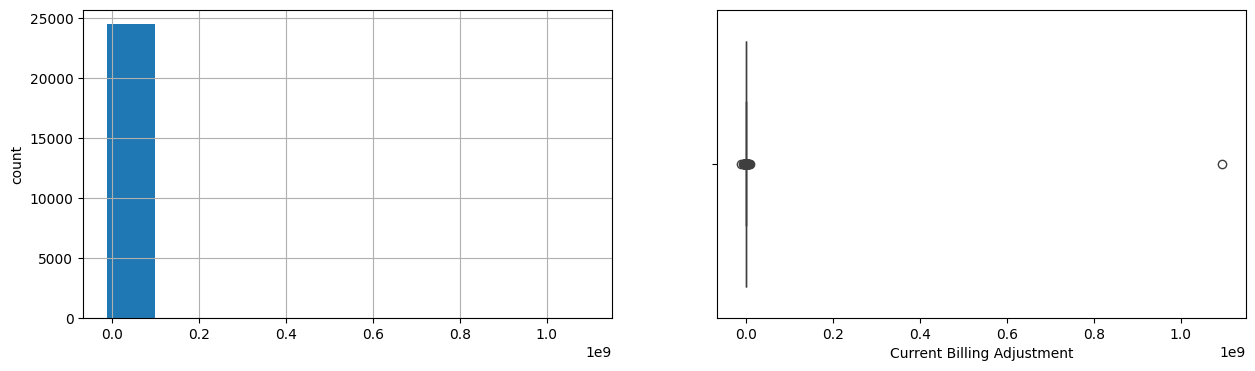

Current Payment
Skew : 113.22


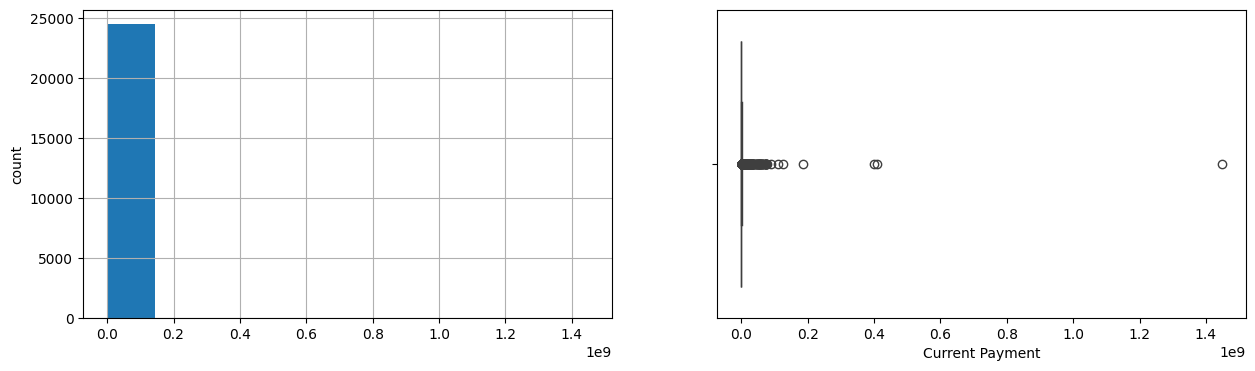

Energy (kWh)
Skew : 16.44


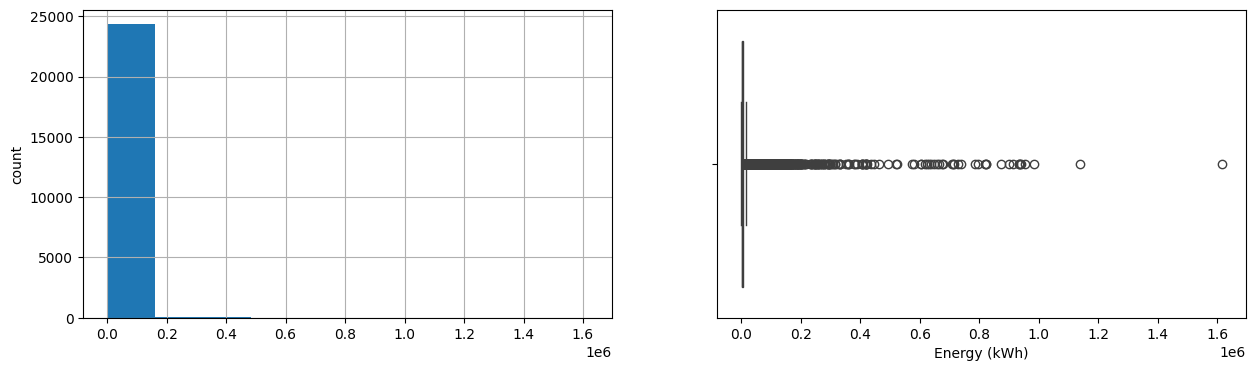

Vat charge (₦)
Skew : 16.66


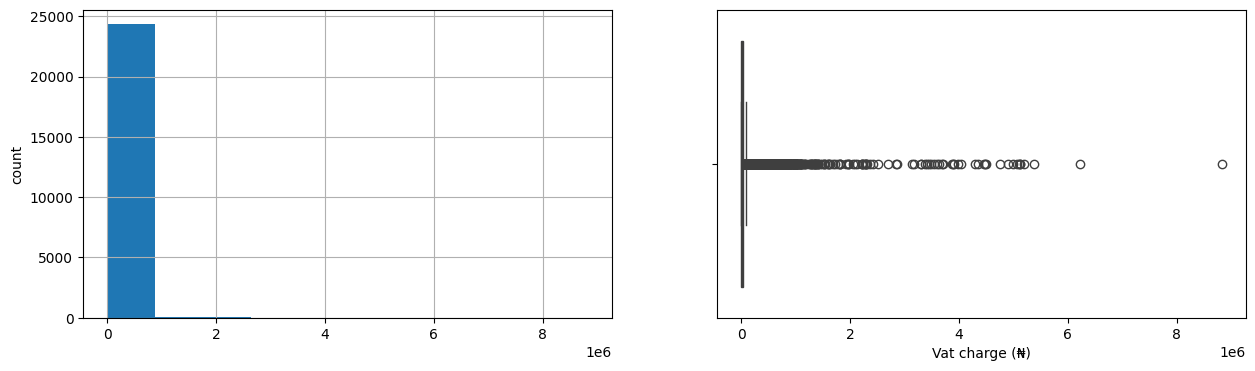

Current Bill
Skew : 16.66


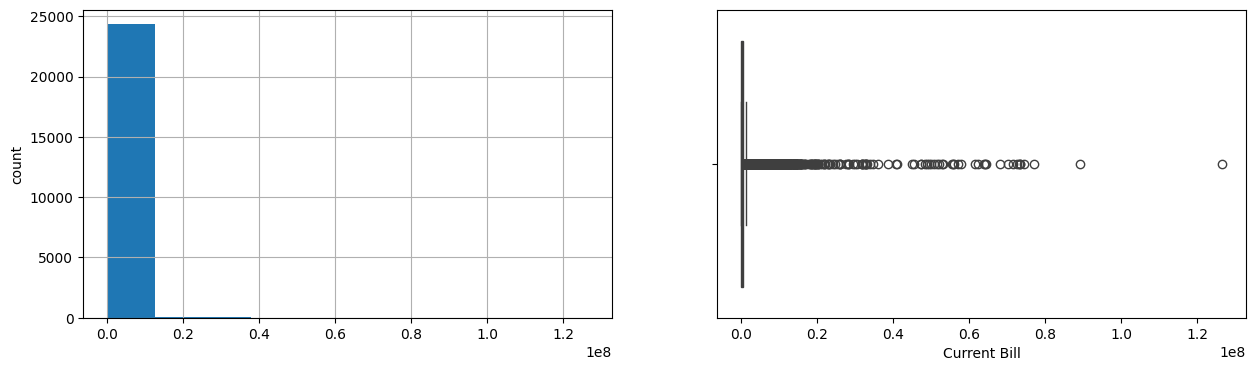

Actual Current Bill
Skew : 123.07


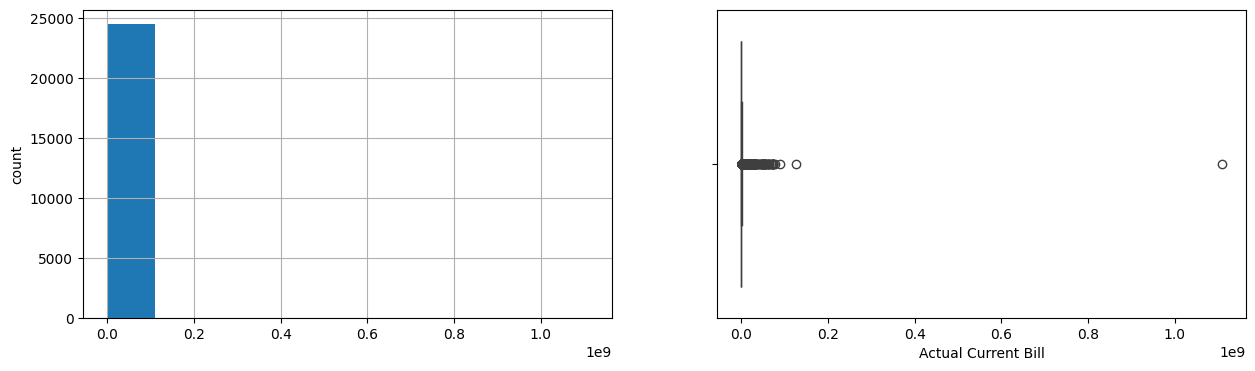

Current Closing bal.
Skew : 60.64


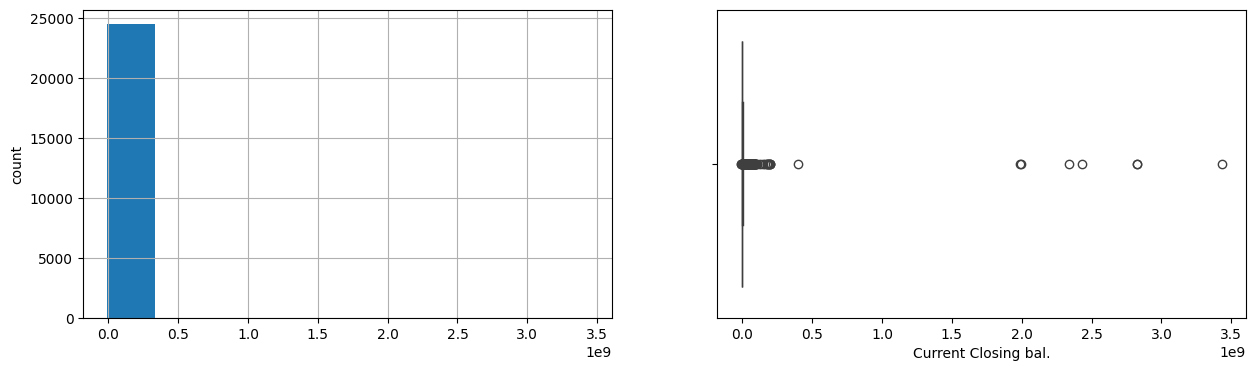

Actual Closing bal.
Skew : 60.64


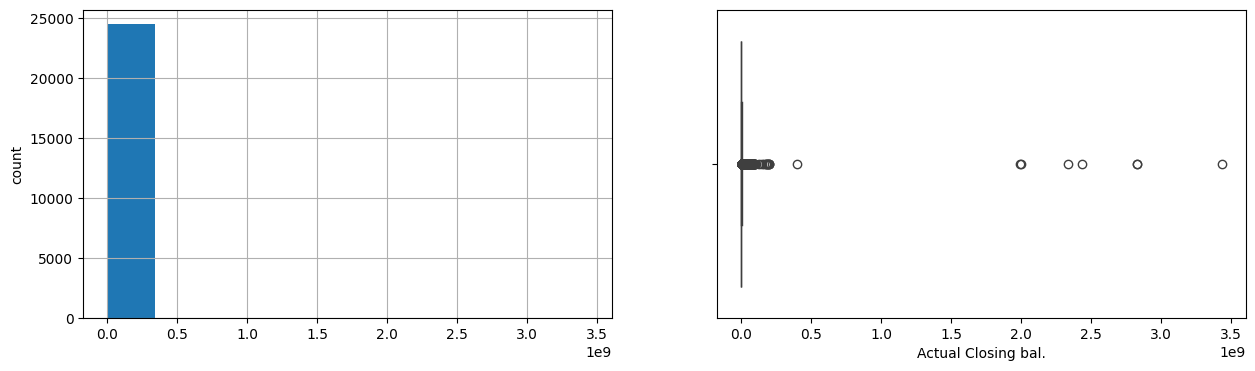

Feeder No
Skew : -17.84


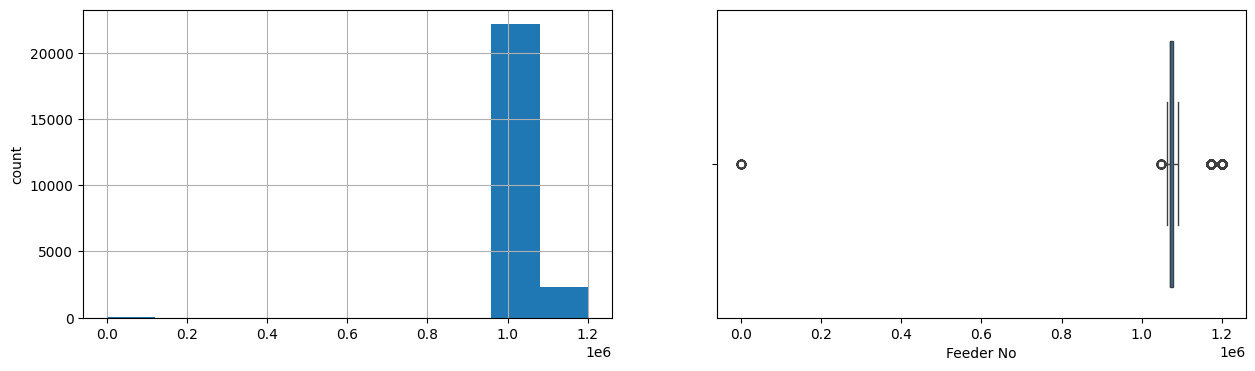

CURRENT ACTIVE MONTH
Skew : -0.35


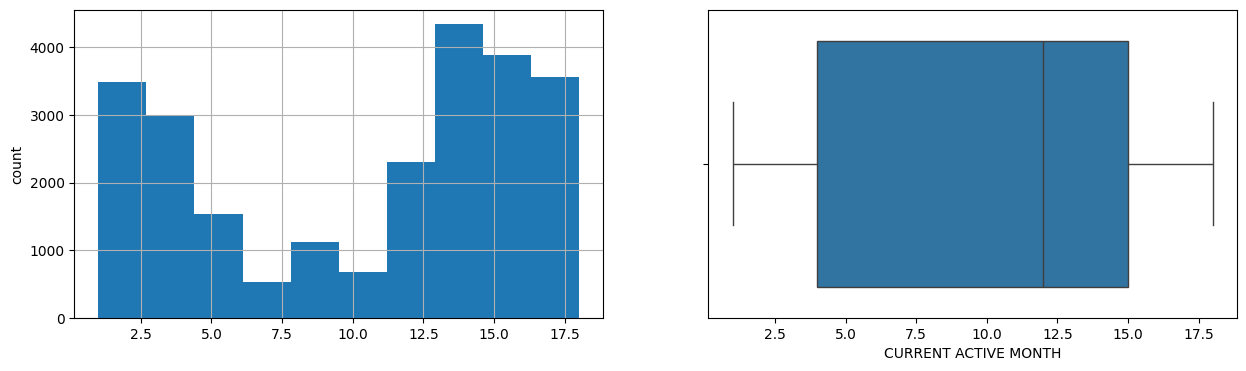

CURRENT NUM MONTHS NO PAYMENT CHECK 
Skew : 0.85


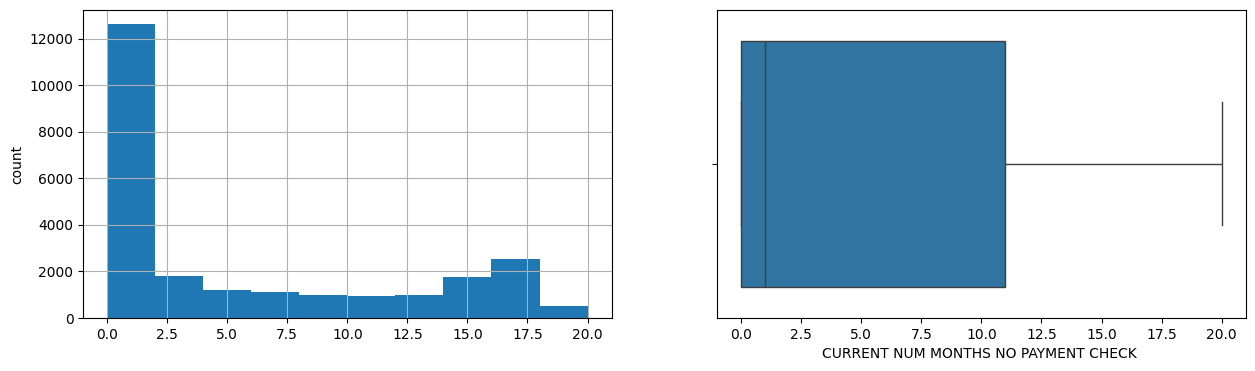

CE O/S
Skew : 145.86


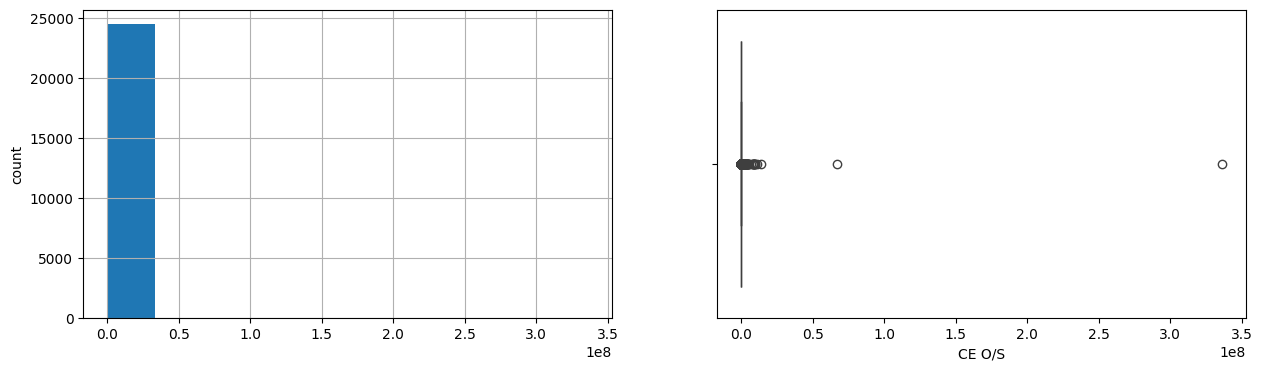

year
Skew : 0.0


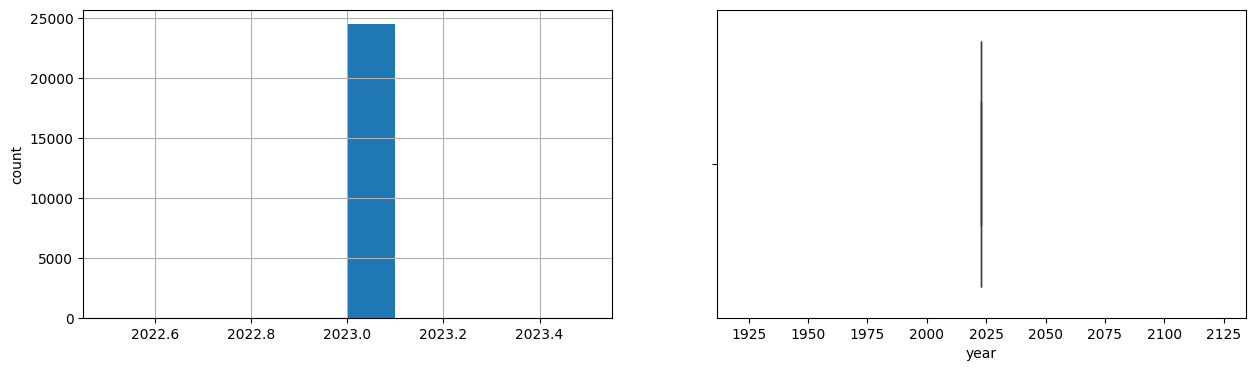

month
Skew : -0.0


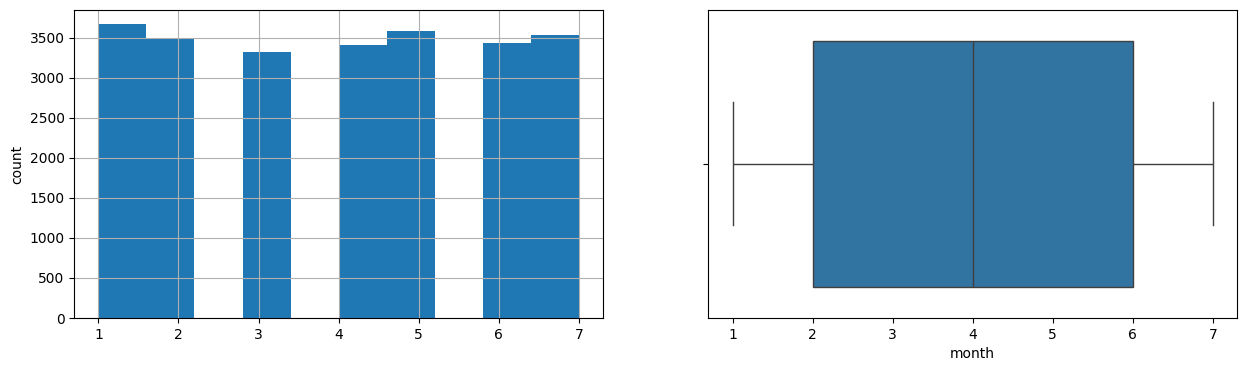

In [32]:
# EDA Univariate Analysis
for col in num_cols:
    print(col)
    print('Skew :', round(df_Electricity_Active_new[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_Electricity_Active_new[col].hist(grid=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_Electricity_Active_new[col])
    plt.show()

In [33]:
df_Electricity_Active_new.columns

Index(['Account Type 2', 'Current Opening bal.', 'Current Billing Adjustment',
       'Current Payment', 'Energy (kWh)', 'Vat charge (₦)', 'Current Bill',
       'Actual Current Bill', 'Current Closing bal.', 'Actual Closing bal.',
       'Feeder No', 'CURRENT ACTIVE MONTH',
       'CURRENT NUM MONTHS NO PAYMENT CHECK ', 'CE O/S', 'year', 'month'],
      dtype='object')

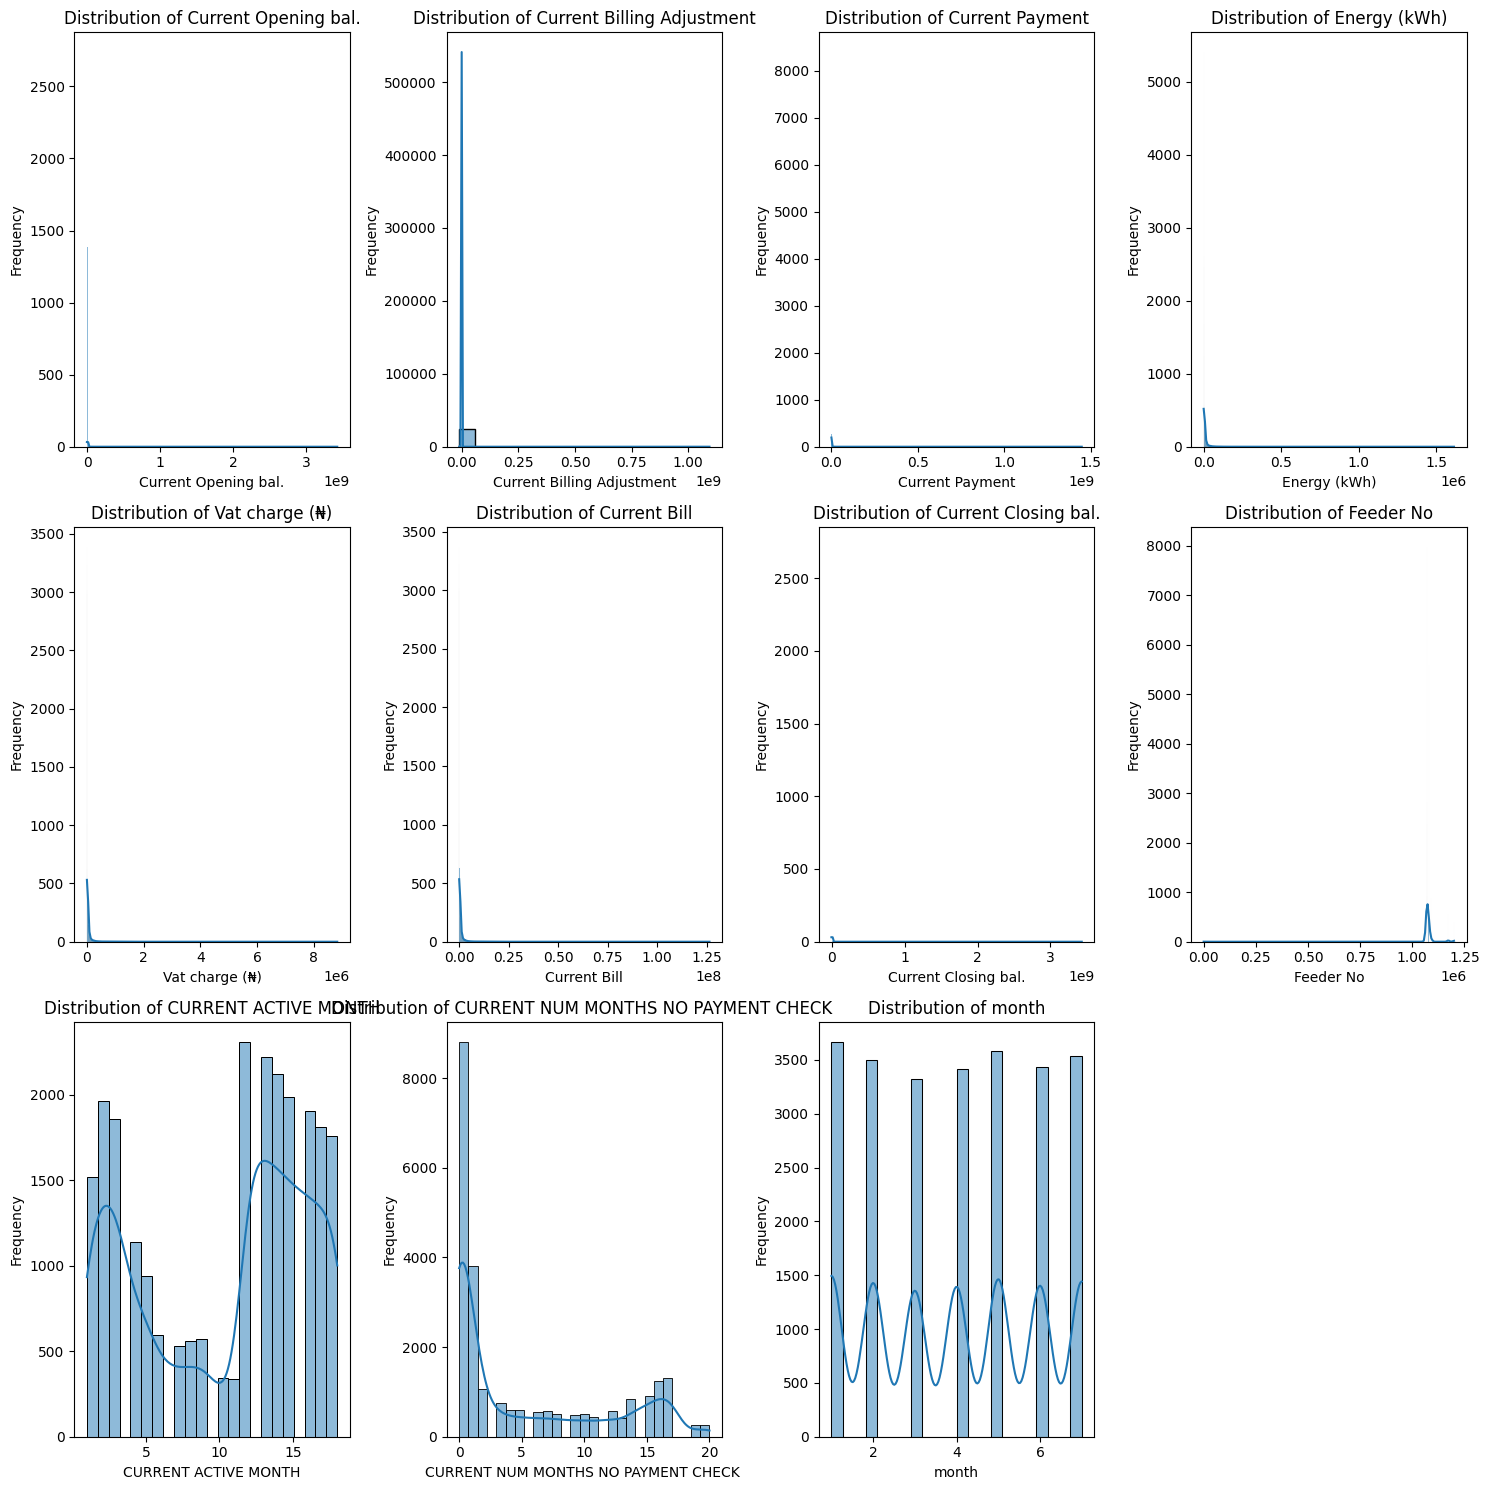

In [34]:
numeric_cols = ['Current Opening bal.','Current Billing Adjustment','Current Payment',
                'Energy (kWh)', 'Vat charge (₦)', 'Current Bill','Current Closing bal.','Feeder No',
                'CURRENT ACTIVE MONTH','CURRENT NUM MONTHS NO PAYMENT CHECK ','month']

# Calculate the number of rows needed for the subplots
num_rows = (len(numeric_cols) + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(15, 5 * num_rows))

# Iterate over the numerical columns and plot histograms
for i, col in enumerate(numeric_cols):
    row = i // 4
    col_num = i % 4
    sns.histplot(df_Electricity_Active_new[col], kde=True, ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Distribution of {col}')
    axes[row, col_num].set_xlabel(col)
    axes[row, col_num].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(numeric_cols), num_rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

<ipython-input-35-1f6fe9235da1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, x='Account Type 2', data=df_Electricity_Active_new, palette=['blue', 'aquamarine', 'skyblue', 'lightblue'],


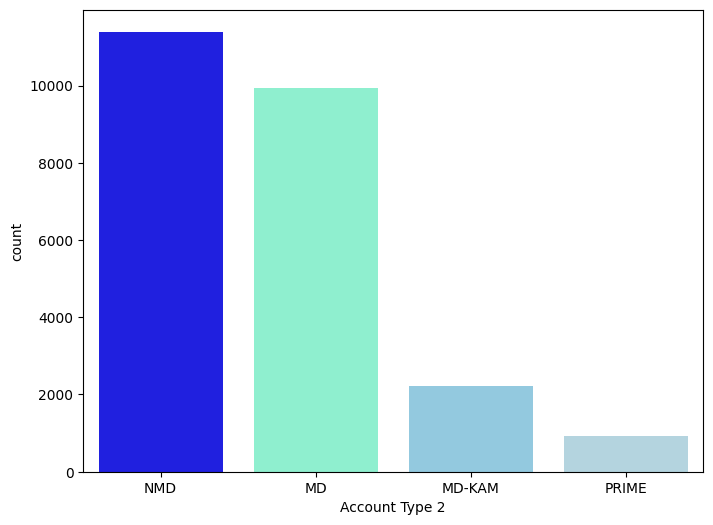

In [35]:
#Distribution plot of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(ax=ax, x='Account Type 2', data=df_Electricity_Active_new, palette=['blue', 'aquamarine', 'skyblue', 'lightblue'],
              order=df_Electricity_Active_new['Account Type 2'].value_counts().index);

In [36]:
# normalize DataFrame using MinMaxScaler because regression model records an improved performance when the errors are normally distributed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Electricity_Active_new_normalized = pd.DataFrame(scaler.fit_transform(df_Electricity_Active_new.drop(['Account Type 2','year','Vat charge (₦)','Actual Current Bill','Actual Closing bal.'], axis=1)), columns=df_Electricity_Active_new.drop(['Account Type 2','year','Vat charge (₦)','Actual Current Bill','Actual Closing bal.'], axis=1).columns)
df_Electricity_Active_new_normalized

Current Opening bal.  Current Billing Adjustment  Current Payment  \
0                  0.002347                    0.010696         0.000174   
1                  0.002333                    0.010696         0.000141   
2                  0.002415                    0.010696         0.000000   
3                  0.002305                    0.010696         0.000000   
4                  0.002307                    0.010696         0.000079   
...                     ...                         ...              ...   
24464              0.002274                    0.010696         0.000000   
24465              0.002274                    0.010696         0.000000   
24466              0.002274                    0.010696         0.000000   
24467              0.002274                    0.010696         0.000000   
24468              0.002274                    0.010696         0.000000   

       Energy (kWh)  Current Bill  Current Closing bal.  Feeder No  \
0          0.002111      0.002111              0.002351   0.901654   
1          0.001740      0.001740              0.002338   0.901654   
2          0.000623      0.000597              0.002437   0.891215   
3          0.000329      0.000315              0.002316   0.891215   
4          0.003149      0.003149              0.002389   0.901654   
...             ...           ...                   ...        ...   
24464      0.000743      0.000319              0.002285   0.892566   
24465      0.000743      0.000637              0.002297   0.892556   
24466      0.000135      0.000116              0.002278   0.892556   
24467      0.001517      0.001448              0.002327   0.892424   
24468      0.000743      0.000738              0.002301   0.892560   

       CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   \
0                  0.823529                                  0.05   
1                  0.823529                                  0.00   
2                  0.823529                                  0.05   
3                  0.058824                                  0.25   
4                  0.823529                                  0.00   
...                     ...                                   ...   
24464              0.000000                                  0.05   
24465              0.000000                                  0.05   
24466              0.000000                                  0.05   
24467              0.000000                                  0.05   
24468              0.000000                                  0.05   

             CE O/S  month  
0      6.973620e-08    0.5  
1      0.000000e+00    0.5  
2      1.469966e-06    0.5  
3      3.009095e-05    0.5  
4      0.000000e+00    0.5  
...             ...    ...  
24464  1.190545e-09    0.0  
24465  0.000000e+00    0.0  
24466  0.000000e+00    0.0  
24467  0.000000e+00    0.0  
24468  0.000000e+00    0.0  

[24469 rows x 11 columns]

In [37]:
#Handling skewnwss in Current payment

In [38]:
#Check for skewness in 'currrent payment' column
payment_skewness = skew(df_Electricity_Active_new_normalized['Current Payment'])

print(f"Skewness of the 'payment' column: {payment_skewness}")

Skewness of the 'payment' column: 113.21234177690486


Text(0.5, 1.0, 'Current Payment_new (Skewness: 113.21)')

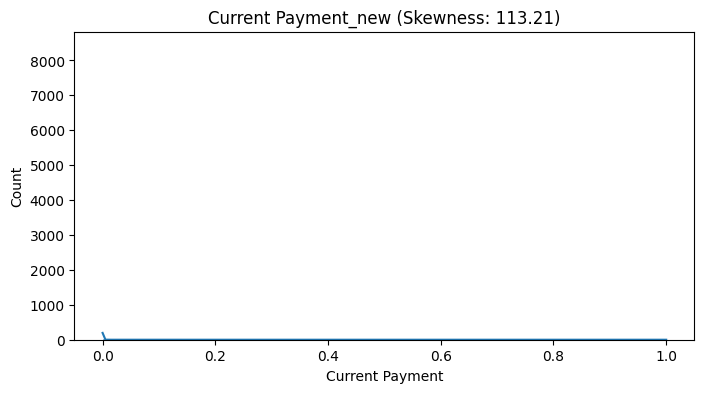

In [39]:
#plot of the histdistribution of current payment with it skew. This show that the currnet payment is right skewed
plt.figure(figsize=(8, 4))
sns.histplot(df_Electricity_Active_new_normalized['Current Payment'], kde=True)
plt.title(f"Current Payment_new (Skewness: {payment_skewness:.2f})")

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


nan


Text(0.5, 1.0, 'Current Payment_log ')

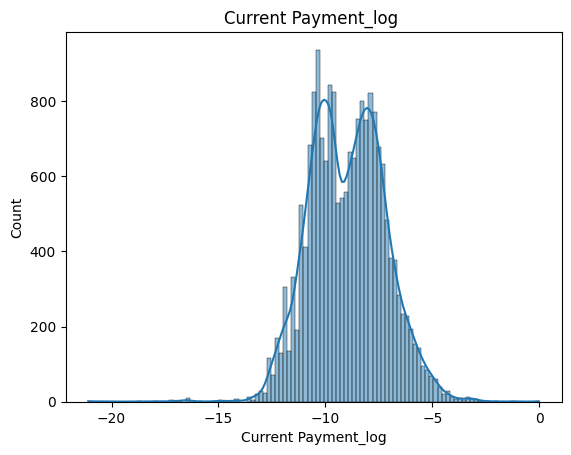

In [40]:
#The transformation fixed the skew. However due to customer with no current payment resulting to 0 current payment,
#we are unable to ascertain the actual value of the skew towards the left.
df_Electricity_Active_new_normalized['Current Payment_log'] = np.log(df_Electricity_Active_new_normalized['Current Payment'])
print(df_Electricity_Active_new_normalized['Current Payment_log'].skew())
sns.histplot(df_Electricity_Active_new_normalized['Current Payment_log'], kde=True)
plt.title(f"Current Payment_log ")

In [41]:
df_Electricity_Active_new['Account Type 2'] = df_Electricity_Active_new['Account Type 2'].astype('category')

In [42]:
# Calculate correlation with target variable
correlation = df_Electricity_Active_new_normalized.corr()['Current Payment_log'].abs().sort_values(ascending=False)

In [43]:
#Print correlation and feature importance
print("Correlation with target variable (Current Payment_log):")
print(correlation)

Correlation with target variable (Current Payment_log):
Current Payment_log                     1.000000
CURRENT NUM MONTHS NO PAYMENT CHECK     0.462382
Energy (kWh)                            0.447300
Current Bill                            0.445308
CURRENT ACTIVE MONTH                    0.416301
Current Payment                         0.182165
Current Opening bal.                    0.101950
Current Closing bal.                    0.095501
CE O/S                                  0.036162
Feeder No                               0.034044
month                                   0.027088
Current Billing Adjustment              0.017621
Name: Current Payment_log, dtype: float64


In [44]:
corr = df_Electricity_Active_new_normalized.drop(columns=['Energy (kWh)','Current Closing bal.']).corr()

<Axes: >

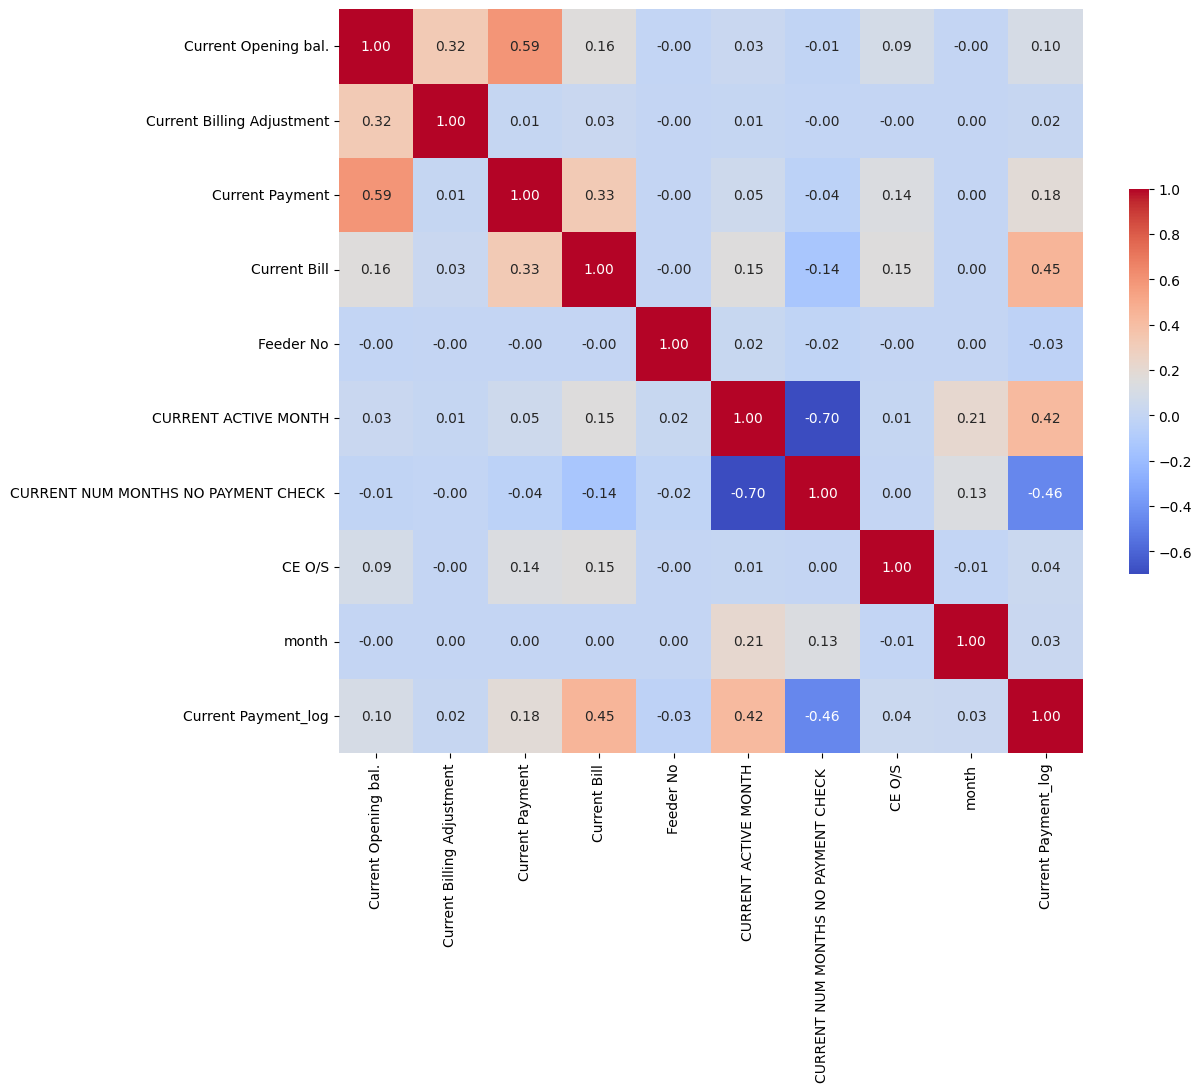

In [45]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': 0.5})

In [46]:
corr.columns

Index(['Current Opening bal.', 'Current Billing Adjustment', 'Current Payment',
       'Current Bill', 'Feeder No', 'CURRENT ACTIVE MONTH',
       'CURRENT NUM MONTHS NO PAYMENT CHECK ', 'CE O/S', 'month',
       'Current Payment_log'],
      dtype='object')

**TO PREDICT CURRENT PAYMENT WE PROPOSE BUILDING THE FOLLOWING Model, Model without MD-KAM &and MD-KAM OMLY:**
1.   Linear Regression Model
2.   Tree Regressor Model
3.   Random Forest



#**MODEL WITHOUT MD-KAM**

In [47]:
!pip install scipy --upgrade
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

!pip install dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.2 MB/s eta 0:00:00
Colab environment detected.


In [48]:
df_Electricity_Active_new_cus = df_Electricity_Active_new[df_Electricity_Active_new['Account Type 2'] != 'MD-KAM']
df_Electricity_Active_new_cus.head(2)

Account Type 2  Current Opening bal.  Current Billing Adjustment  \
0             MD             252274.69                         0.0   
1             MD             204499.36                         0.0   

   Current Payment  Energy (kWh)  Vat charge (₦)  Current Bill  \
0        252500.00          3410        18626.27     266976.57   
1        204499.36          2810        15348.92     220001.22   

   Actual Current Bill  Current Closing bal.  Actual Closing bal.  Feeder No  \
0            266976.57             266751.26            266751.26  1081849.0   
1            220001.22             220001.22            220001.22  1081849.0   

   CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   CE O/S  year  \
0                    15                                     1   23.43  2023   
1                    15                                     0    0.00  2023   

   month  
0      4  
1      4

In [178]:
df_Electricity_Active_new_cus.describe().T.round(2)

count        mean         std  \
Current Opening bal.                  22251.0   608175.60  1908481.69   
Current Billing Adjustment            22251.0    -3668.41    88404.23   
Current Payment                       22251.0   255924.19   489329.49   
Energy (kWh)                          22251.0     3844.99     6181.57   
Vat charge (₦)                        22251.0    19940.11    33264.89   
Current Bill                          22251.0   286941.72   479106.74   
Actual Current Bill                   22251.0   285833.22   480990.37   
Current Closing bal.                  22251.0   636820.00  1921442.45   
Actual Closing bal.                   22251.0   639006.23  1919641.86   
Feeder No                             22251.0  1076989.66    40913.86   
CURRENT ACTIVE MONTH                  22251.0        9.93        5.77   
CURRENT NUM MONTHS NO PAYMENT CHECK   22251.0        5.69        6.48   
CE O/S                                22251.0    12432.70    97675.72   
year                                  22251.0     2023.00        0.00   
month                                 22251.0        3.99        2.02   

                                             min         25%         50%  \
Current Opening bal.                 -6667739.02    72944.99   244230.56   
Current Billing Adjustment           -4412022.96        0.00        0.00   
Current Payment                             0.00     6000.00    65000.00   
Energy (kWh)                                0.00      882.00     1500.00   
Vat charge (₦)                              0.00     3710.14     7106.63   
Current Bill                                0.00    53464.14   101861.63   
Actual Current Bill                         0.00    50655.24   100749.00   
Current Closing bal.                 -5202480.45    96264.76   264226.21   
Actual Closing bal.                         0.00    95408.65   263586.81   
Feeder No                                   0.00  1070351.00  1070920.00   
CURRENT ACTIVE MONTH                        1.00        4.00       12.00   
CURRENT NUM MONTHS NO PAYMENT CHECK         0.00        0.00        2.00   
CE O/S                                      0.00        0.00        0.00   
year                                     2023.00     2023.00     2023.00   
month                                       1.00        2.00        4.00   

                                             75%          max  
Current Opening bal.                   649663.60  82016371.96  
Current Billing Adjustment                  0.00   4230750.34  
Current Payment                        317178.85  20670000.00  
Energy (kWh)                             4600.00    258340.00  
Vat charge (₦)                          24301.55   1411117.66  
Current Bill                           349825.02  20226019.86  
Actual Current Bill                    347838.02  20226019.86  
Current Closing bal.                   671106.36  81703248.65  
Actual Closing bal.                    670479.34  81703248.65  
Feeder No                             1079205.00   1199849.00  
CURRENT ACTIVE MONTH                       15.00        18.00  
CURRENT NUM MONTHS NO PAYMENT CHECK        12.00        20.00  
CE O/S                                      0.15   3846280.77  
year                                     2023.00      2023.00  
month                                       6.00         7.00

In [50]:
df_Electricity_Active_new_cus['Account Type 2'].value_counts()
#

Account Type 2
NMD       11394
MD         9924
PRIME       933
MD-KAM        0
Name: count, dtype: int64

In [51]:
df_Electricity_Active_new_cus.shape

(22251, 16)

#Linear Regression

In [52]:
#Linear Regression
Outcome='Current Payment'
Predictors=['Current Opening bal.','Current Billing Adjustment','Current Bill','Feeder No','CURRENT ACTIVE MONTH','CURRENT NUM MONTHS NO PAYMENT CHECK ', 'CE O/S', 'month']
x=df_Electricity_Active_new_cus[Predictors]
y=df_Electricity_Active_new_cus[Outcome]

In [53]:
#stratify is introduced to ensture that outliers are evenly distributed.
train_X, valid_X, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1, stratify=pd.qcut(y, q=10, labels=False, duplicates='drop'))

In [54]:
print(df_Electricity_Active_new.shape)
print(train_X.shape)
print(train_y.shape)
print(valid_y.shape)
valid_X.shape

(24469, 16)
(15575, 8)
(15575,)
(6676,)


(6676, 8)

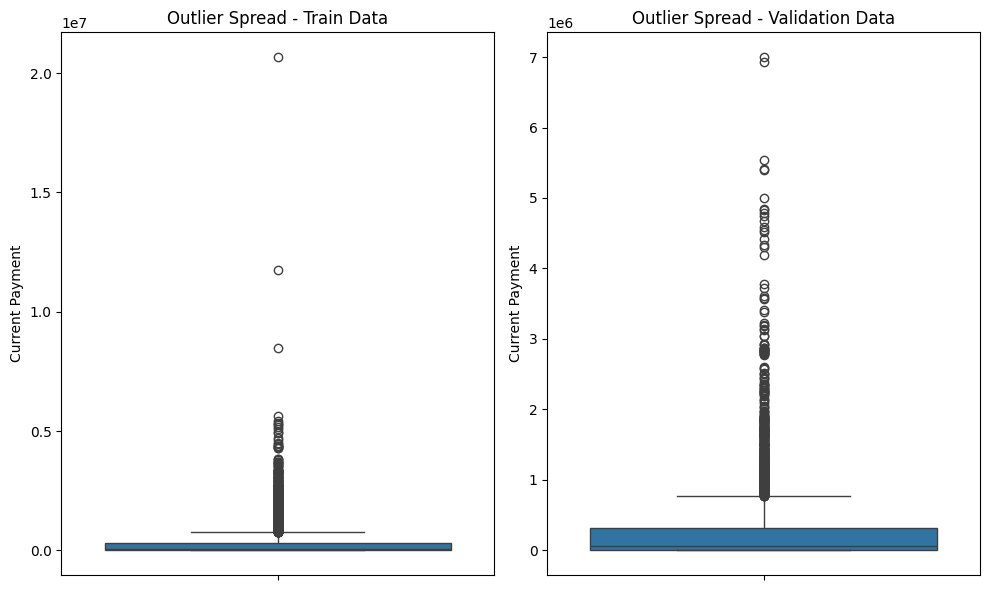

In [55]:
# exploring the outlier spread on 'train_y' and 'valid_y' of our target variables
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=train_y)
plt.title('Outlier Spread - Train Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=valid_y)
plt.title('Outlier Spread - Validation Data')

plt.tight_layout()
plt.show()

In [56]:
df_Electricity_Active_new_cus_lm = LinearRegression()
df_Electricity_Active_new_cus_lm.fit(train_X, train_y)

LinearRegression()

In [57]:
df_Electricity_Active_new_cus_lm.intercept_

-129225.51889709552

In [58]:
df_Electricity_Active_new_cus_lm.coef_

array([ 7.52737367e-03,  2.50537649e-01,  8.71945169e-01,  9.82151574e-02,
        3.97812516e+03, -2.01238720e+03, -1.66992923e-01, -3.28368990e+02])

In [59]:
print(df_Electricity_Active_new_cus_lm.predict(train_X))

[  48389.63909263  -46390.64323408  344837.02453366 ...  100548.3634275
  -36586.91939816 1455553.8217418 ]


In [60]:
regressionSummary(train_y, df_Electricity_Active_new_cus_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 232715.0033
     Mean Absolute Error (MAE) : 95906.3342


**Mean Error (ME)**: This tells you the average difference between your model's predictions of current payment and the actual current payment values. **A ME** of -0.0000 suggests that, on average, your model is neither overpredicting nor underpredicting on the training data set.

**Root Mean Squared Error (RMSE)**: This measures the average magnitude of the errors in your predictions. A higher RMSE indicates larger errors. On average, the predictions of the regression model using the trainig data set are off by about **232715 units** of the target variable

**Mean Absolute Error (MAE):** Similar to RMSE, MAE measures the average absolute difference between predicted and actual values. It's less sensitive to extreme errors than RMSE. Your MAE of **95906.33** suggests that, on average, your predictions are off by about this amount.

**OVerall:** The high price variance accross the category of customers (NMD, PRIME & NMD) is also a major factor that affected the RMSE more and MAE

In [61]:
regressionSummary(valid_y, df_Electricity_Active_new_cus_lm.predict(valid_X))


Regression statistics

               Mean Error (ME) : 2785.0320
Root Mean Squared Error (RMSE) : 211015.1769
     Mean Absolute Error (MAE) : 94771.3190


**Mean Error (ME)**: This tells you the average difference between your model's predictions of current payment and the actual current payment values. **A ME** of 2785.03 suggests that, on average, your model is overfitted to the training data set.

**Root Mean Squared Error (RMSE)**: This measures the average magnitude of the errors in your predictions. A higher RMSE indicates larger errors. On average, the predictions of the regression model using the validation data set are off by about **211015 units** of the target variable

**Mean Absolute Error (MAE):** Similar to RMSE, MAE measures the average absolute difference between predicted and actual values. It's less sensitive to extreme errors than RMSE. Your MAE of **94771.31** suggests that, on average, your predictions are off by about this amount.

**OVerall:** The high price variance accross the category of customers (NMD, PRIME & NMD) is also a major factor that affected the RMSE more and MAE

In [62]:
pred_y=df_Electricity_Active_new_cus_lm.predict(train_X)
pred_y

array([  48389.63909263,  -46390.64323408,  344837.02453366, ...,
        100548.3634275 ,  -36586.91939816, 1455553.8217418 ])

In [63]:
#adjusted_r2_score of the model using the trainig data set
adjusted_r2_score(train_y, pred_y, df_Electricity_Active_new_cus_lm)

0.7723028204086935

In [64]:
Pred_valid = df_Electricity_Active_new_cus_lm.predict(valid_X)
Pred_valid

array([114807.44224108,  82481.17212132,  -9346.0973457 , ...,
        34226.0035859 , 130391.87794108,  30941.98860576])

In [65]:
#adjusted_r2_score of the model using the validation data set
adjusted_r2_score(valid_y, Pred_valid, df_Electricity_Active_new_cus_lm)

0.8164056887016743

**The linear regression model appears to be overfitted to the training data set**

In [66]:
df_Electricity_Active_new_lm_predict = df_Electricity_Active_new_cus_lm.predict(valid_X)

In [67]:
result = pd.DataFrame({'predicted' : df_Electricity_Active_new_lm_predict ,
                       'actual' : valid_y,
                       'residual' : (valid_y - df_Electricity_Active_new_lm_predict)/valid_y })
result.head(5)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


predicted    actual  residual
2670   114807.442241       0.0      -inf
39435   82481.172121  139635.1  0.409309
18309   -9346.097346   72000.0  1.129807
28558   39754.882556       0.0      -inf
61811  166315.328056  271000.0  0.386290

In [68]:
df_Electricity_Active_new_cus_lm.score(train_X, train_y)

0.7724197831309697

In [69]:
df_Electricity_Active_new_cus_lm.score(valid_X, valid_y)

0.816625726827575

In [70]:
from sklearn.metrics import accuracy_score, classification_report

#**Regression Tress**

In [71]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

In [72]:
param_grid = {
    'max_depth' : [2, 3, 5, 10, 15, 20, 25],
    'min_samples_split' : [2, 5, 10, 20, 30, 40],
    'min_impurity_decrease' : [0.05, 0.02, 0.01, 0.001, 0.0001, 0.00001]
}

In [73]:
# Use DecisionTreeRegressor for continuous target variables
gridsearch = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5)
gridsearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001,
                                                   0.0001, 1e-05],
                         'min_samples_split': [2, 5, 10, 20, 30, 40]})

In [74]:
regtree = gridsearch.best_estimator_
regtree

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.05,
                      min_samples_split=20, random_state=1)

In [75]:
#Regression Summary
regressionSummary(train_y, regtree.predict(train_X))
regressionSummary(valid_y, regtree.predict(valid_X))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 185645.3644
     Mean Absolute Error (MAE) : 72568.7032

Regression statistics

               Mean Error (ME) : -960.6827
Root Mean Squared Error (RMSE) : 209906.8485
     Mean Absolute Error (MAE) : 76763.4021


In [76]:
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

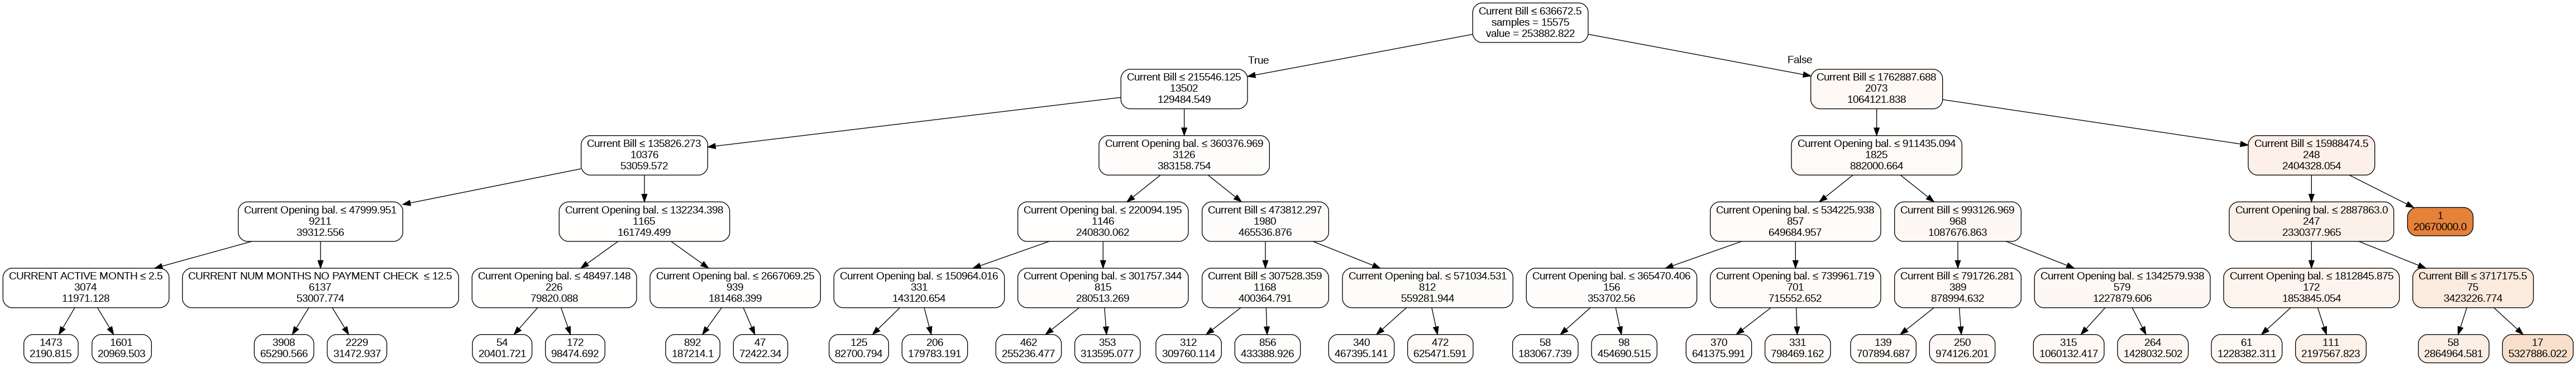

In [77]:
plotDecisionTree(regtree, feature_names=train_X.columns)

In [78]:
valid_X.columns

Index(['Current Opening bal.', 'Current Billing Adjustment', 'Current Bill',
       'Feeder No', 'CURRENT ACTIVE MONTH',
       'CURRENT NUM MONTHS NO PAYMENT CHECK ', 'CE O/S', 'month'],
      dtype='object')

In [79]:
# Predict values for the validation set
predicted_values = regtree.predict(valid_X)

# Create a DataFrame to compare predicted and actual values
comparison_df = pd.DataFrame({'Actual': valid_y, 'Predicted': predicted_values, 'Oustanding': valid_X['Current Opening bal.']})

# Calculate residuals (difference between actual and predicted)
comparison_df['Residual'] = comparison_df['Actual'] - comparison_df['Predicted']

# Print the comparison DataFrame
print(comparison_df.head(10))

           Actual     Predicted  Oustanding       Residual
2670         0.00  6.529057e+04   181295.46  -65290.565752
39435   139635.10  3.147294e+04   139635.10  108162.163163
18309    72000.00  6.529057e+04    72115.32    6709.434248
28558        0.00  2.190815e+03        0.00   -2190.815350
61811   271000.00  1.872141e+05   874673.36   83785.900426
2530         0.00  4.333889e+05  2302809.41 -433388.925607
39017    84000.00  6.529057e+04    83885.61   18709.434248
38715   584608.23  1.060132e+06  1211650.86 -475524.186794
48105   307609.00  6.529057e+04  2136717.07  242318.434248
47712  1225193.63  1.060132e+06  1225193.63  165061.213206


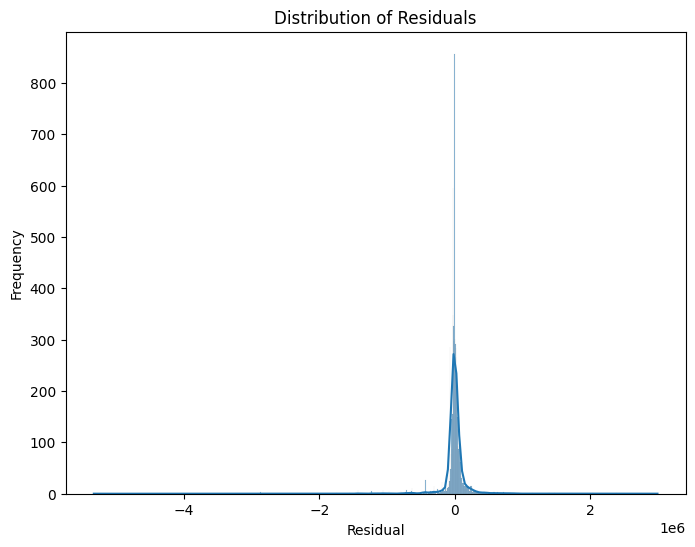

Summary Statistics of Residuals:
Mean: -960.6826830087999
Standard Deviation: 209920.3727216761
Minimum: -5327886.022352941
Maximum: 2992166.687727273


In [80]:
# Plotting residuals
plt.figure(figsize=(8, 6))
sns.histplot(comparison_df['Residual'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Calculating summary statistics
residual_mean = comparison_df['Residual'].mean()
residual_std = comparison_df['Residual'].std()
residual_min = comparison_df['Residual'].min()
residual_max = comparison_df['Residual'].max()

print("Summary Statistics of Residuals:")
print(f"Mean: {residual_mean}")
print(f"Standard Deviation: {residual_std}")
print(f"Minimum: {residual_min}")
print(f"Maximum: {residual_max}")

**Based on the Summary Statistics of residuals: Regression Tree**

**Mean: -960.68** this indicates that, on average, the model's predictions are underestimating the actual values by approximately -960.68 units. A mean close to zero is ideal.

**Standard Deviation: 209920.37** This large standard deviation indicates a wide spread of residuals. It means the differences between your model's predictions and the actual values can be quite large for some data points. This suggests your model might not be capturing all the underlying patterns in the data, leading to some significant prediction errors.

**Minimum: -5327886.02** This shows that for at least one data point, your model drastically underestimated the actual value. This is a very large negative residual, indicating a potential outlier or a region in your data where the model performs poorly.

**Maximum: 2992166.68** Similar to the minimum, this very large positive residual shows that your model significantly overestimated the actual value for at least one data point. This also points towards potential outliers or areas where the model struggles.




In [81]:
regtree.score(train_X, train_y)

0.8551715246768179

In [82]:
regtree.score(valid_X, valid_y)

0.8185469646944545

#**Using Random FOREST**

In [83]:
rf = RandomForestRegressor(random_state=1, n_estimators=500) # Change to RandomForestRegressor for continuous target
rf.fit(train_X, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [84]:
rf.feature_importances_

array([0.16209369, 0.00387545, 0.77126719, 0.01165846, 0.01489873,
       0.01637366, 0.01467034, 0.00516248])

In [85]:
regressionSummary(train_y, rf.predict(train_X)) #on Train


Regression statistics

               Mean Error (ME) : -447.1167
Root Mean Squared Error (RMSE) : 77834.9681
     Mean Absolute Error (MAE) : 20787.4706


In [86]:
#On validation
regressionSummary(valid_y, rf.predict(valid_X)) # Using regressionSummary for continuous target


Regression statistics

               Mean Error (ME) : -2184.2538
Root Mean Squared Error (RMSE) : 182316.8887
     Mean Absolute Error (MAE) : 54649.6319


In [87]:
#Random forest Summary statistics

# Predict values for the validation set
predicted_values_rf = rf.predict(valid_X)

# Create a DataFrame to compare predicted and actual values
comparison_df_rf = pd.DataFrame({'Actual': valid_y, 'Predicted': predicted_values_rf,'Oustanding': valid_X['Current Opening bal.']})

# Calculate residuals (difference between actual and predicted)
comparison_df_rf['Residual'] = comparison_df_rf['Actual'] - comparison_df_rf['Predicted']

# Print the comparison DataFrame
print(comparison_df_rf.head(10))  # Adjust the number of rows to display as needed

           Actual     Predicted  Oustanding      Residual
2670         0.00  7.688955e+04   181295.46  -76889.54934
39435   139635.10  8.776055e+04   139635.10   51874.54538
18309    72000.00  6.246512e+04    72115.32    9534.87590
28558        0.00  0.000000e+00        0.00       0.00000
61811   271000.00  2.394236e+05   874673.36   31576.43346
2530         0.00  4.117016e+05  2302809.41 -411701.56494
39017    84000.00  7.898791e+04    83885.61    5012.09266
38715   584608.23  1.074676e+06  1211650.86 -490067.89484
48105   307609.00  1.485473e+05  2136717.07  159061.67216
47712  1225193.63  1.222684e+06  1225193.63    2509.47184


In [88]:
ACT = comparison_df_rf['Actual'].sum()
Pred = comparison_df_rf['Predicted'].sum()

In [89]:
Billed = valid_X['Current Bill'].sum()

In [90]:
ACT/Billed

0.8984935781027568

In [91]:
Pred/Billed

0.9060219190251618

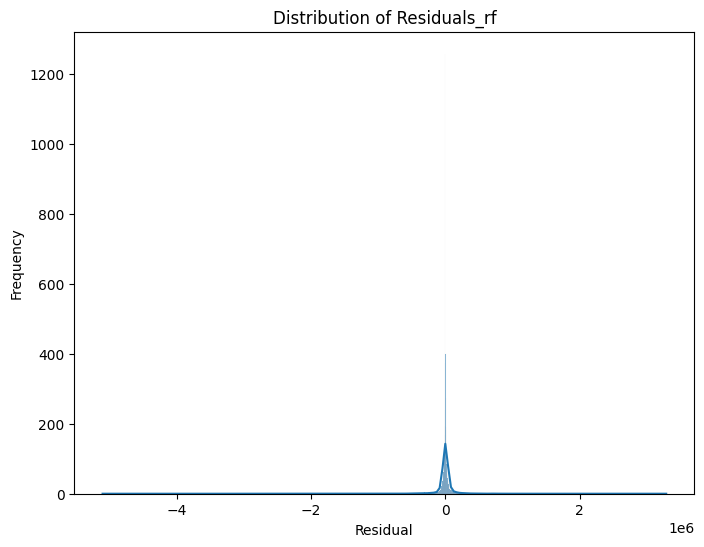

Summary Statistics of Residuals:
Mean: -2184.2538415134013
Standard Deviation: 182317.45916500955
Minimum: -5108006.109580008
Maximum: 3290126.1850199993


In [92]:
# Plotting residuals
plt.figure(figsize=(8, 6))
sns.histplot(comparison_df_rf['Residual'], kde=True)
plt.title('Distribution of Residuals_rf')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Calculating summary statistics
residual_mean_rf = comparison_df_rf['Residual'].mean()
residual_std_rf = comparison_df_rf['Residual'].std()
residual_min_rf = comparison_df_rf['Residual'].min()
residual_max_rf = comparison_df_rf['Residual'].max()

print("Summary Statistics of Residuals:")
print(f"Mean: {residual_mean_rf}")
print(f"Standard Deviation: {residual_std_rf}")
print(f"Minimum: {residual_min_rf}")
print(f"Maximum: {residual_max_rf}")

**Mean: -2184.25**
 A negative mean indicates the model, on average, tends to underestimate the actual values by roughly -2184.25 units. This suggests a systematic under-prediction bias. Whether this is significant depends on the scale of the values you're predicting (a small bias for large values might be acceptable).

**Standard Deviation: 182317.45**
 This large standard deviation tells us the spread of errors is wide. Some predictions are very close to the actual values, while others are off by a considerable amount. This could be due to high variability in the data itself, or the model struggling to capture complex relationships.

**Minimum: -5108006.10**
 This extremely low value shows that for at least one data point, your model drastically underestimated the true value. This is a strong indicator of an outlier or a region in your data where the model performs very poorly.

**Maximum: 3290126.18**
 Similarly, this high maximum residual means the model significantly overestimated for at least one data point. Again, this points to potential outliers or areas where the model struggles.

  **The extreme minimum and maximum residuals strongly suggest the presence of outliers or specific data regions where the model fails to generalize well. This is because the MD category energy consumption are way higher than other category consquently, the payment is very higher introducing outliers in payment which may affect the model.** we may need to treat separately

In [93]:
rf.score(train_X, train_y)

0.9745413574570176

In [94]:
rf.score(valid_X, valid_y)

0.8631121751886318

In [95]:
# Comparing the three models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = [df_Electricity_Active_new_cus_lm, regtree, rf]
model_names = ['Linear Regression', 'Regression Tree', 'Random Forest']

for model, name in zip(models, model_names):
    predictions = model.predict(valid_X)
    mse = mean_squared_error(valid_y, predictions)
    rmse = mean_squared_error(valid_y, predictions, squared=False)
    mae = mean_absolute_error(valid_y, predictions)

    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("-" * 30)

Model: Linear Regression
Mean Squared Error (MSE): 44527404890.39029
Root Mean Squared Error (RMSE): 211015.17691955308
Mean Absolute Error (MAE): 94771.31904813932
------------------------------
Model: Regression Tree
Mean Squared Error (MSE): 44060885051.433075
Root Mean Squared Error (RMSE): 209906.84851007856
Mean Absolute Error (MAE): 76763.40210677551
------------------------------
Model: Random Forest
Mean Squared Error (MSE): 33239447903.410583
Root Mean Squared Error (RMSE): 182316.88869496042
Mean Absolute Error (MAE): 54649.63194734574
------------------------------


**Random Forest appears to be the best model considering that it has the least minimum deviation from the target.**

*   **In Conclusion: Based on the business case it better to over estimate as will help the business reduce customers outstanding by working towards paying current plus outstanding.**
*   **The extreme minimum and maximum residuals strongly suggest the presence of outliers or specific data regions where the model fails to generalize well. This is because the MD category energy consumption are way higher than other category consquently, the payment is very higher introducing outliers in payment which may affect the model.** we may need to treat separately

In [96]:
df_Electricity_Active_new_cus['Current Payment'].mean()

255924.1875430318

In [97]:
df_Electricity_Active_new_cus['Current Bill'].mean()

286941.72090063366

#MDKAM Customers

In [98]:
df_Electricity_Active_new_cus_mdkam = df_Electricity_Active_new[df_Electricity_Active_new['Account Type 2'] == 'MD-KAM']
df_Electricity_Active_new_cus_mdkam.head(2)

Account Type 2  Current Opening bal.  Current Billing Adjustment  \
50          MD-KAM             354850.17                  -376037.68   
109         MD-KAM            6638315.01                        0.00   

     Current Payment  Energy (kWh)  Vat charge (₦)  Current Bill  \
50              0.00          2553        13945.12     199880.11   
109       6638315.01         64712       338524.65    4852186.65   

     Actual Current Bill  Current Closing bal.  Actual Closing bal.  \
50                  0.00             178692.60            178692.60   
109           4852186.65            4852186.65           4852186.65   

     Feeder No  CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   \
50   1079493.0                    15                                    17   
109  1079545.0                    15                                     1   

     CE O/S  year  month  
50      0.0  2023      4  
109     0.0  2023      4

In [99]:
df_Electricity_Active_new_cus_mdkam.shape

(2218, 16)

In [100]:
df_Electricity_Active_new_cus_mdkam['Account Type 2'].value_counts()

Account Type 2
MD-KAM    2218
MD           0
NMD          0
PRIME        0
Name: count, dtype: int64

In [101]:
#Linear Regression
Outcome_mdkam='Current Payment'
predictors_mdkam=['Current Opening bal.','Current Billing Adjustment','Current Bill','Feeder No','CURRENT ACTIVE MONTH','CURRENT NUM MONTHS NO PAYMENT CHECK ', 'CE O/S', 'month']
X=df_Electricity_Active_new_cus_mdkam[Predictors]
y=df_Electricity_Active_new_cus_mdkam[Outcome]

In [102]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=1,stratify=pd.qcut(y, q=5, labels=False, duplicates='drop'))

In [103]:
print(df_Electricity_Active_new_cus_mdkam.shape)
print(X_train.shape)
print(y_train.shape)
print(y_valid.shape)
X_valid.shape

(2218, 16)
(1109, 8)
(1109,)
(1109,)


(1109, 8)

In [104]:
df_Electricity_Active_new_cus_mdkam_lm = LinearRegression()
df_Electricity_Active_new_cus_mdkam_lm.fit(train_X, train_y)

LinearRegression()

In [105]:
df_Electricity_Active_new_cus_mdkam_lm.intercept_

-129225.51889709552

In [106]:
df_Electricity_Active_new_cus_mdkam_lm.coef_

array([ 7.52737367e-03,  2.50537649e-01,  8.71945169e-01,  9.82151574e-02,
        3.97812516e+03, -2.01238720e+03, -1.66992923e-01, -3.28368990e+02])

In [107]:
print(df_Electricity_Active_new_cus_mdkam_lm.predict(X_train))

[1482014.25119493 3265048.9499617  3814718.47595323 ...  679684.61674223
 1453605.15235739  284523.41422641]


In [108]:
regressionSummary(y_train, df_Electricity_Active_new_cus_mdkam_lm.predict(X_train))


Regression statistics

               Mean Error (ME) : 893699.9362
Root Mean Squared Error (RMSE) : 18539494.6539
     Mean Absolute Error (MAE) : 2368791.3799


In [109]:
regressionSummary(y_valid, df_Electricity_Active_new_cus_mdkam_lm.predict(X_valid))


Regression statistics

               Mean Error (ME) : 1938173.9570
Root Mean Squared Error (RMSE) : 42851982.1022
     Mean Absolute Error (MAE) : 2687155.2191


In [110]:
pred_mdkam_y=df_Electricity_Active_new_cus_mdkam_lm.predict(X_train)
pred_mdkam_y

array([1482014.25119493, 3265048.9499617 , 3814718.47595323, ...,
        679684.61674223, 1453605.15235739,  284523.41422641])

In [111]:
#adjusted_r2_score of the model using the trainig data set
adjusted_r2_score(y_train, pred_mdkam_y, df_Electricity_Active_new_cus_mdkam_lm)

0.058242808047485495

In [112]:
Pred_mdkam_valid = df_Electricity_Active_new_cus_mdkam_lm.predict(X_valid)
Pred_mdkam_valid

array([2001713.33010968, 2801861.12828151, 2562851.19368367, ...,
        832225.6497116 ,  276027.17431031, 5120259.39810407])

In [113]:
#adjusted_r2_score of the model using the validation data set
adjusted_r2_score(y_valid, Pred_mdkam_valid, df_Electricity_Active_new_cus_mdkam_lm)

0.0680599028997858

In [114]:
df_Electricity_Active_mdkam_lm_predict = df_Electricity_Active_new_cus_mdkam_lm.predict(X_valid)

In [115]:
result = pd.DataFrame({'predicted' : df_Electricity_Active_mdkam_lm_predict ,
                       'actual' : y_valid,
                       'residual' : (y_valid - df_Electricity_Active_mdkam_lm_predict)/y_valid })
result.head(5)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


predicted      actual  residual
39142  2.001713e+06  5142006.00  0.610714
9669   2.801861e+06  2502874.03 -0.119458
60055  2.562851e+06  2604965.80  0.016167
55651  5.433444e+05   777921.75  0.301544
63705  3.509449e+06  3744059.08  0.062662

#Regression Trees

In [116]:
param_grid = {
    'max_depth' : [2, 3, 5, 10, 15, 20, 25],
    'min_samples_split' : [2, 5, 10, 20, 30, 40],
    'min_impurity_decrease' : [0.05, 0.02, 0.01, 0.001, 0.0001, 0.00001]
}

In [117]:
# Use DecisionTreeRegressor for continuous target variables
gridsearch = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001,
                                                   0.0001, 1e-05],
                         'min_samples_split': [2, 5, 10, 20, 30, 40]})

In [118]:
regtree_mdkam = gridsearch.best_estimator_
regtree_mdkam

DecisionTreeRegressor(max_depth=15, min_impurity_decrease=0.05, random_state=1)

In [119]:
#Regression Summary
regressionSummary(y_train, regtree.predict(X_train))
regressionSummary(y_valid, regtree.predict(X_valid))


Regression statistics

               Mean Error (ME) : 2032798.1162
Root Mean Squared Error (RMSE) : 17889189.9984
     Mean Absolute Error (MAE) : 2819390.9346

Regression statistics

               Mean Error (ME) : 2928303.9683
Root Mean Squared Error (RMSE) : 44081405.5427
     Mean Absolute Error (MAE) : 3534363.6125


In [120]:
plotDecisionTree(regtree_mdkam, feature_names=X_train.columns)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.604468 to fit


In [121]:
# Assuming you have already trained a regression tree model called 'regtree'
# and have your validation data in 'valid_X' and 'valid_y'

# Predict values for the validation set
predicted_values_mdkam = regtree_mdkam.predict(X_valid)

# Create a DataFrame to compare predicted and actual values
comparison_df_mdkam = pd.DataFrame({'Actual': y_valid, 'Predicted': predicted_values_mdkam, 'Oustanding': X_valid['Current Opening bal.']})

# Calculate residuals (difference between actual and predicted)
comparison_df_mdkam['Residual'] = comparison_df_mdkam['Actual'] - comparison_df_mdkam['Predicted']

# Print the comparison DataFrame
print(comparison_df_mdkam.head(10))  # Adjust the number of rows to display as needed

           Actual     Predicted  Oustanding      Residual
39142  5142006.00  0.000000e+00  5156774.59  5.142006e+06
9669   2502874.03  2.490902e+06  2502874.03  1.197227e+04
60055  2604965.80  2.686412e+06  2604965.80 -8.144580e+04
55651   777921.75  1.055958e+06  1278286.70 -2.780364e+05
63705  3744059.08  3.737239e+06  3744059.08  6.820452e+03
816    3883295.60  3.899953e+06  3883295.60 -1.665771e+04
2518   5343185.16  5.329030e+06  5343185.16  1.415485e+04
817    2429408.52  2.490902e+06  2429408.52 -6.149324e+04
794    8494551.54  8.480225e+06  8494551.54  1.432648e+04
1712   5712985.48  5.765983e+06  5712985.48 -5.299769e+04


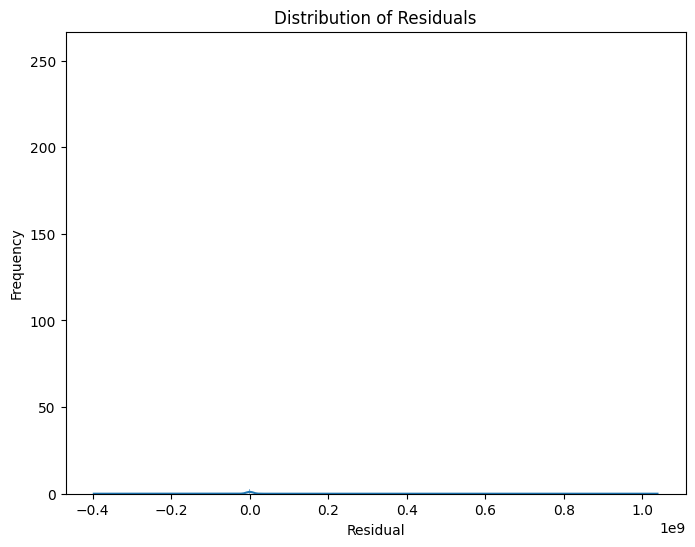

Summary Statistics of Residuals:
Mean: 401890.7380957155
Standard Deviation: 34124590.62331339
Minimum: -397189953.26
Maximum: 1038154508.9300001


In [122]:
# Plotting residuals
plt.figure(figsize=(8, 6))
sns.histplot(comparison_df_mdkam['Residual'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Calculating summary statistics
residual_mean_mdkam = comparison_df_mdkam['Residual'].mean()
residual_std_mdkam = comparison_df_mdkam['Residual'].std()
residual_min_mdkam = comparison_df_mdkam['Residual'].min()
residual_max_mdkam = comparison_df_mdkam['Residual'].max()

print("Summary Statistics of Residuals:")
print(f"Mean: {residual_mean_mdkam}")
print(f"Standard Deviation: {residual_std_mdkam}")
print(f"Minimum: {residual_min_mdkam}")
print(f"Maximum: {residual_max_mdkam}")

#Random Forest for MDKAM

In [123]:
rf_mdkam = RandomForestRegressor(random_state=1, n_estimators=500) # Change to RandomForestRegressor for continuous target
rf_mdkam.fit(train_X, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [124]:
rf_mdkam.feature_importances_

array([0.16209369, 0.00387545, 0.77126719, 0.01165846, 0.01489873,
       0.01637366, 0.01467034, 0.00516248])

In [125]:
#on Train
regressionSummary(y_train, rf_mdkam.predict(X_train))


Regression statistics

               Mean Error (ME) : 1963787.0614
Root Mean Squared Error (RMSE) : 17965412.2711
     Mean Absolute Error (MAE) : 2600268.9570


In [126]:
#on Validation
regressionSummary(y_valid, rf_mdkam.predict(X_valid))


Regression statistics

               Mean Error (ME) : 2688180.5522
Root Mean Squared Error (RMSE) : 43955805.4791
     Mean Absolute Error (MAE) : 3225869.5111


In [127]:
#Random forest Summary statistics

# Predict values for the validation set
predicted_values_rf_mdkam = rf_mdkam.predict(X_valid)

# Create a DataFrame to compare predicted and actual values
comparison_df_rf_mdkam = pd.DataFrame({'Actual': y_valid, 'Predicted': predicted_values_rf_mdkam,'Oustanding': X_valid['Current Opening bal.']})

# Calculate residuals (difference between actual and predicted)
comparison_df_rf_mdkam['Residual'] = comparison_df_rf_mdkam['Actual'] - comparison_df_rf_mdkam['Predicted']

# Print the comparison DataFrame
print(comparison_df_rf_mdkam.head(10))  # Adjust the number of rows to display as needed

           Actual     Predicted  Oustanding      Residual
39142  5142006.00  3.124323e+06  5156774.59  2.017683e+06
9669   2502874.03  2.424977e+06  2502874.03  7.789698e+04
60055  2604965.80  2.514709e+06  2604965.80  9.025661e+04
55651   777921.75  5.837435e+05  1278286.70  1.941782e+05
63705  3744059.08  3.907006e+06  3744059.08 -1.629467e+05
816    3883295.60  4.235709e+06  3883295.60 -3.524131e+05
2518   5343185.16  5.402976e+06  5343185.16 -5.979110e+04
817    2429408.52  1.448066e+06  2429408.52  9.813426e+05
794    8494551.54  5.110345e+06  8494551.54  3.384207e+06
1712   5712985.48  5.162048e+06  5712985.48  5.509375e+05


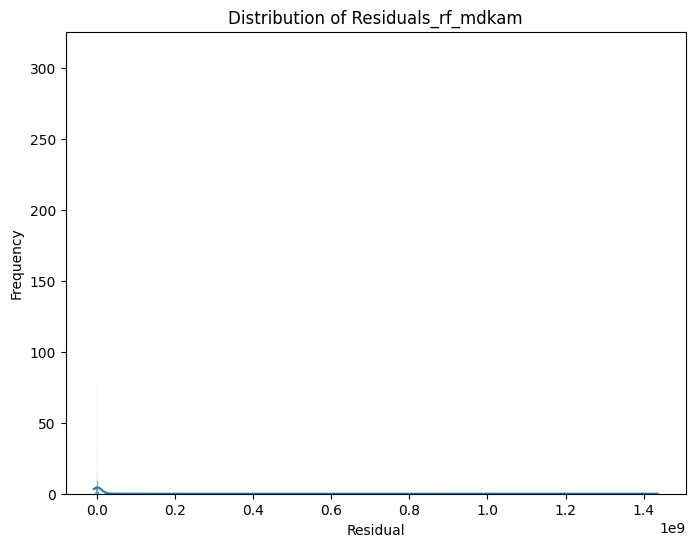

Summary Statistics of Residuals:
Mean: 2688180.552201314
Standard Deviation: 43893322.75910611
Minimum: -8601763.851120008
Maximum: 1435642375.5856202


In [128]:
# Plotting residuals
plt.figure(figsize=(8, 6))
sns.histplot(comparison_df_rf_mdkam['Residual'], kde=True)
plt.title('Distribution of Residuals_rf_mdkam')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Calculating summary statistics
residual_mean_rf_mdkam = comparison_df_rf_mdkam['Residual'].mean()
residual_std_rf_mdkam = comparison_df_rf_mdkam['Residual'].std()
residual_min_rf_mdkam = comparison_df_rf_mdkam['Residual'].min()
residual_max_rf_mdkam = comparison_df_rf_mdkam['Residual'].max()

print("Summary Statistics of Residuals:")
print(f"Mean: {residual_mean_rf_mdkam}")
print(f"Standard Deviation: {residual_std_rf_mdkam}")
print(f"Minimum: {residual_min_rf_mdkam}")
print(f"Maximum: {residual_max_rf_mdkam}")

In [129]:
# Comparing the three models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models_mdkam = [df_Electricity_Active_new_cus_mdkam_lm, regtree_mdkam, rf_mdkam]
model_names_mdkam = ['Linear Regression', 'Regression Tree', 'Random Forest']

for model, name in zip(models_mdkam, model_names_mdkam):
    predictions_mdkam = model.predict(X_valid)
    mse_mdkam = mean_squared_error(y_valid, predictions_mdkam)
    rmse_mdkam = mean_squared_error(y_valid, predictions_mdkam, squared=False)
    mae_mdkam = mean_absolute_error(y_valid, predictions_mdkam)

    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse_mdkam}")
    print(f"Root Mean Squared Error (RMSE): {rmse_mdkam}")
    print(f"Mean Absolute Error (MAE): {mae_mdkam}")
    print("-" * 30)

Model: Linear Regression
Mean Squared Error (MSE): 1836292370088293.5
Root Mean Squared Error (RMSE): 42851982.10221195
Mean Absolute Error (MAE): 2687155.219079956
------------------------------
Model: Regression Tree
Mean Squared Error (MSE): 1163599167392843.2
Root Mean Squared Error (RMSE): 34111569.40676936
Mean Absolute Error (MAE): 2335257.6844209787
------------------------------
Model: Random Forest
Mean Squared Error (MSE): 1932112835313559.0
Root Mean Squared Error (RMSE): 43955805.479066804
Mean Absolute Error (MAE): 3225869.5110909804
------------------------------


#**CLUSTERING USING K-MEANS**

In [130]:
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

#Dropping the columns not needed

In [131]:
df_Electricity_Active_new_Clus = df_Electricity_Active_new[df_Electricity_Active_new['Account Type 2'] != 'MD-KAM'].drop(['Account Type 2','year','Vat charge (₦)','Actual Current Bill','Actual Closing bal.'], axis=1)

In [132]:
df_Electricity_Active_new_Clus.columns

Index(['Current Opening bal.', 'Current Billing Adjustment', 'Current Payment',
       'Energy (kWh)', 'Current Bill', 'Current Closing bal.', 'Feeder No',
       'CURRENT ACTIVE MONTH', 'CURRENT NUM MONTHS NO PAYMENT CHECK ',
       'CE O/S', 'month'],
      dtype='object')

In [133]:
df_Electricity_Active_new_Clus.set_index('Feeder No', inplace= True)

In [134]:
df_Electricity_Active_new_Clus

Current Opening bal.  Current Billing Adjustment  Current Payment  \
Feeder No                                                                      
1081849.0             252274.69                         0.0        252500.00   
1081849.0             204499.36                         0.0        204499.36   
1069324.0             486259.19                         0.0             0.00   
1069324.0             107378.90                         0.0             0.00   
1081849.0             114541.56                         0.0        114541.56   
...                         ...                         ...              ...   
1070945.0                  0.00                         0.0             0.00   
1070933.0                  0.00                         0.0             0.00   
1070933.0                  0.00                         0.0             0.00   
1070774.0                  0.00                         0.0             0.00   
1070937.0                  0.00                         0.0             0.00   

           Energy (kWh)  Current Bill  Current Closing bal.  \
Feeder No                                                     
1081849.0          3410     266976.57             266751.26   
1081849.0          2810     220001.22             220001.22   
1069324.0          1007      75506.12             561765.31   
1069324.0           532      39890.03             147268.93   
1081849.0          5086     398194.38             398194.38   
...                 ...           ...                   ...   
1070945.0          1200      40299.60              40299.60   
1070933.0          1200      80599.20              80599.20   
1070933.0           218      14642.19              14642.19   
1070774.0          2450     183098.30             183098.30   
1070937.0          1200      93396.00              93396.00   

           CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   \
Feeder No                                                               
1081849.0                    15                                     1   
1081849.0                    15                                     0   
1069324.0                    15                                     1   
1069324.0                     2                                     5   
1081849.0                    15                                     0   
...                         ...                                   ...   
1070945.0                     1                                     1   
1070933.0                     1                                     1   
1070933.0                     1                                     1   
1070774.0                     1                                     1   
1070937.0                     1                                     1   

             CE O/S  month  
Feeder No                   
1081849.0     23.43      4  
1081849.0      0.00      4  
1069324.0    493.88      4  
1069324.0  10109.97      4  
1081849.0      0.00      4  
...             ...    ...  
1070945.0      0.40      1  
1070933.0      0.00      1  
1070933.0      0.00      1  
1070774.0      0.00      1  
1070937.0      0.00      1  

[22251 rows x 10 columns]

In [135]:
df_Electricity_Active_new_Clus = df_Electricity_Active_new_Clus.apply(lambda x: x.astype('float64'))

In [136]:
df_Electricity_Active_new_Clus

Current Opening bal.  Current Billing Adjustment  Current Payment  \
Feeder No                                                                      
1081849.0             252274.69                         0.0        252500.00   
1081849.0             204499.36                         0.0        204499.36   
1069324.0             486259.19                         0.0             0.00   
1069324.0             107378.90                         0.0             0.00   
1081849.0             114541.56                         0.0        114541.56   
...                         ...                         ...              ...   
1070945.0                  0.00                         0.0             0.00   
1070933.0                  0.00                         0.0             0.00   
1070933.0                  0.00                         0.0             0.00   
1070774.0                  0.00                         0.0             0.00   
1070937.0                  0.00                         0.0             0.00   

           Energy (kWh)  Current Bill  Current Closing bal.  \
Feeder No                                                     
1081849.0        3410.0     266976.57             266751.26   
1081849.0        2810.0     220001.22             220001.22   
1069324.0        1007.0      75506.12             561765.31   
1069324.0         532.0      39890.03             147268.93   
1081849.0        5086.0     398194.38             398194.38   
...                 ...           ...                   ...   
1070945.0        1200.0      40299.60              40299.60   
1070933.0        1200.0      80599.20              80599.20   
1070933.0         218.0      14642.19              14642.19   
1070774.0        2450.0     183098.30             183098.30   
1070937.0        1200.0      93396.00              93396.00   

           CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   \
Feeder No                                                               
1081849.0                  15.0                                   1.0   
1081849.0                  15.0                                   0.0   
1069324.0                  15.0                                   1.0   
1069324.0                   2.0                                   5.0   
1081849.0                  15.0                                   0.0   
...                         ...                                   ...   
1070945.0                   1.0                                   1.0   
1070933.0                   1.0                                   1.0   
1070933.0                   1.0                                   1.0   
1070774.0                   1.0                                   1.0   
1070937.0                   1.0                                   1.0   

             CE O/S  month  
Feeder No                   
1081849.0     23.43    4.0  
1081849.0      0.00    4.0  
1069324.0    493.88    4.0  
1069324.0  10109.97    4.0  
1081849.0      0.00    4.0  
...             ...    ...  
1070945.0      0.40    1.0  
1070933.0      0.00    1.0  
1070933.0      0.00    1.0  
1070774.0      0.00    1.0  
1070937.0      0.00    1.0  

[22251 rows x 10 columns]

In [137]:
df_Electricity_Active_new_Clus_norm = df_Electricity_Active_new_Clus.apply(preprocessing.scale, axis=0)

#**Using the elbow method of inertia plot to determine the number of cluster**

In [138]:
inertia = []
for n_clusters in range (1,7):
  kmeans = KMeans(n_clusters=n_clusters, random_state = 0).fit(df_Electricity_Active_new_Clus_norm)
  inertia.append(kmeans.inertia_/n_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f9ee76ad000>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
   

In [139]:
inertias = pd.DataFrame({'n_clusters':range(1,7), 'inertia':inertia})

In [140]:
inertias

n_clusters        inertia
0           1  222510.000000
1           2   91059.240596
2           3   50694.438221
3           4   30839.678879
4           5   22340.627791
5           6   16395.418472

In [141]:
ax = inertias.plot(x='n_clusters',y='inertia')

**Based on the inertia plot above, the elbow that appears to have maximum or effective clustering is at 4**

In [142]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_Electricity_Active_new_Clus_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [143]:
kmeans

KMeans(n_clusters=4, random_state=0)

In [144]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [145]:
#Clustering based Feeders
memb = pd.Series(kmeans.labels_, index=df_Electricity_Active_new_Clus_norm.index)
for key, item in memb.groupby(memb):
 print(key, ': ', ', '.join(str(x) for x in item.index))

0 :  1069324.0, 1081849.0, 1079534.0, 1070774.0, 1172349.0, 1172349.0, 1070774.0, 1079201.0, 1081849.0, 1069324.0, 1172349.0, 1172349.0, 1069328.0, 1069328.0, 1172349.0, 1069324.0, 1081849.0, 1081849.0, 1081849.0, 1069324.0, 1172349.0, 1070774.0, 1070774.0, 1069324.0, 1070774.0, 1070774.0, 1070774.0, 1081849.0, 1069324.0, 1081849.0, 1172349.0, 1069324.0, 1081849.0, 1081849.0, 1070774.0, 1069324.0, 1069324.0, 1070774.0, 1070774.0, 1070774.0, 1070774.0, 1069328.0, 1081849.0, 1172349.0, 1070774.0, 1069324.0, 1070774.0, 1079201.0, 1065347.0, 1069281.0, 1070846.0, 1069281.0, 1070846.0, 1070842.0, 1069281.0, 1069281.0, 1069281.0, 1069281.0, 1070842.0, 1070842.0, 1069281.0, 1070846.0, 1069281.0, 1070842.0, 1069281.0, 1069281.0, 1070842.0, 1070842.0, 1070846.0, 1069281.0, 1070842.0, 1069288.0, 1070899.0, 1069288.0, 1070846.0, 1069281.0, 1070846.0, 1070842.0, 1070842.0, 1069281.0, 1069281.0, 1069281.0, 1070846.0, 1070846.0, 1069281.0, 1070842.0, 1070842.0, 1070846.0, 1069281.0, 1070899.0, 10692

In [146]:
# Create a dictionary to store DataFrames for each cluster
cluster_dfs = {}

# Iterate over the unique cluster labels
for cluster_label in memb.unique():
    # Filter the normalized DataFrame to get data points in the current cluster
    cluster_data = df_Electricity_Active_new_Clus[memb == cluster_label]
    # Create a DataFrame for the current cluster and store it in the dictionary
    cluster_dfs[cluster_label] = cluster_data

In [147]:
cluster_0_df = cluster_dfs[0]
cluster_1_df = cluster_dfs[1]
cluster_2_df = cluster_dfs[2]
cluster_3_df = cluster_dfs[3]

In [148]:
print(cluster_0_df.shape)
print(cluster_1_df.shape)
print(cluster_2_df.shape)
print(cluster_3_df.shape)

(9288, 10)
(11235, 10)
(1716, 10)
(12, 10)


In [149]:
#Group 1 (Low consumption with average 95% (high) respone to Bill): 11,235.0 Customers whose average current payment is 249413.19
#with average energy consumption of less than 4000KWH, average current bill is 267685.64 and they have missed payment avearge 2twice
#Comparing their response to payment to their current bill. They pay 93.7% of their current bill.
cluster_1_df.describe().T.round(2)

count       mean         std  \
Current Opening bal.                  11235.0  651997.78  1106629.69   
Current Billing Adjustment            11235.0   -2986.28    76927.13   
Current Payment                       11235.0  249413.19   250742.69   
Energy (kWh)                          11235.0    3583.40     3030.14   
Current Bill                          11235.0  267685.64   235572.81   
Current Closing bal.                  11235.0  667283.95  1126237.04   
CURRENT ACTIVE MONTH                  11235.0      14.38        2.40   
CURRENT NUM MONTHS NO PAYMENT CHECK   11235.0       1.53        2.45   
CE O/S                                11235.0   10125.51    61729.70   
month                                 11235.0       3.95        2.00   

                                             min        25%        50%  \
Current Opening bal.                 -6667739.02  138532.43  351927.48   
Current Billing Adjustment           -3702565.54       0.00       0.00   
Current Payment                             0.00   45000.00  162000.00   
Energy (kWh)                                0.00    1200.00    2500.00   
Current Bill                                0.00   80599.20  183367.48   
Current Closing bal.                 -5202480.45  141065.33  361707.05   
CURRENT ACTIVE MONTH                        1.00      13.00      14.00   
CURRENT NUM MONTHS NO PAYMENT CHECK         0.00       0.00       0.00   
CE O/S                                      0.00       0.00       0.00   
month                                       1.00       2.00       4.00   

                                            75%          max  
Current Opening bal.                  678324.05  14931238.01  
Current Billing Adjustment                 0.00   1574300.56  
Current Payment                       400000.00   2122189.73  
Energy (kWh)                            5500.00     19543.00  
Current Bill                          416364.54   1465358.57  
Current Closing bal.                  691143.88  15031987.01  
CURRENT ACTIVE MONTH                      16.00        18.00  
CURRENT NUM MONTHS NO PAYMENT CHECK        2.00        17.00  
CE O/S                                     2.32   1574300.56  
month                                      6.00         7.00

In [150]:
#Group 0 (Low consumption with average 54.6% (low) respone to Bill): 9288 Customers whose average current payment is 47508.28
#with average energy consumption of less than 4000KWH, average current bill is 87005.68 and
#Comparing their response to payment to their current bill. They pay 54.6% of their current bill.
cluster_0_df.describe().T.round(2)

count       mean        std  \
Current Opening bal.                  9288.0  262684.64  564215.74   
Current Billing Adjustment            9288.0   -3796.74   63325.49   
Current Payment                       9288.0   47508.28  109383.68   
Energy (kWh)                          9288.0    1281.41    1451.05   
Current Bill                          9288.0   87005.68  109772.85   
Current Closing bal.                  9288.0  301488.36  571278.99   
CURRENT ACTIVE MONTH                  9288.0       3.83       2.50   
CURRENT NUM MONTHS NO PAYMENT CHECK   9288.0      11.46       5.78   
CE O/S                                9288.0    7554.30   50221.52   
month                                 9288.0       4.00       2.05   

                                             min       25%        50%  \
Current Opening bal.                  -349253.38  12821.99   91309.36   
Current Billing Adjustment           -4412022.96      0.00       0.00   
Current Payment                             0.00      0.00    8000.00   
Energy (kWh)                                0.00    500.00    1200.00   
Current Bill                                0.00  31227.89   70073.74   
Current Closing bal.                  -349253.38  61896.41  129388.37   
CURRENT ACTIVE MONTH                        1.00      2.00       3.00   
CURRENT NUM MONTHS NO PAYMENT CHECK         0.00      8.00      13.00   
CE O/S                                      0.00      0.00       0.00   
month                                       1.00      2.00       4.00   

                                            75%          max  
Current Opening bal.                  265668.01  11508776.63  
Current Billing Adjustment                 0.00   1106442.68  
Current Payment                        50000.00   2000000.00  
Energy (kWh)                            1500.00     20520.00  
Current Bill                          100749.00   1315309.80  
Current Closing bal.                  309042.72  11312028.20  
CURRENT ACTIVE MONTH                       5.00        17.00  
CURRENT NUM MONTHS NO PAYMENT CHECK       16.00        20.00  
CE O/S                                     0.00   1757135.73  
month                                      6.00         7.00

In [151]:
#Group Rec (high Energy consumers with average 95.4% (high) respone to Bill): 1716 Customers whose average current payment is 1421212.74
#with average energy consumption of greater than 4000KWH (19347.29), average current bill is 1488350.16 and
#Comparing their response to payment to their current bill. They pay 95.4% of their current bill.
cluster_2_df.describe().T.round(2)

count        mean         std  \
Current Opening bal.                  1716.0  1717656.70  1369316.12   
Current Billing Adjustment            1716.0    -7465.60   202229.53   
Current Payment                       1716.0  1421212.74  1014480.23   
Energy (kWh)                          1716.0    19347.29    12086.82   
Current Bill                          1716.0  1488350.16   935977.30   
Current Closing bal.                  1716.0  1777328.52  1433967.90   
CURRENT ACTIVE MONTH                  1716.0       13.89        3.64   
CURRENT NUM MONTHS NO PAYMENT CHECK   1716.0        1.70        3.84   
CE O/S                                1716.0    53282.40   288306.09   
month                                 1716.0        4.11        2.00   

                                             min         25%         50%  \
Current Opening bal.                 -5202480.45  1017909.15  1290250.47   
Current Billing Adjustment           -3147426.74        0.00        0.00   
Current Payment                             0.00   948984.29  1176750.68   
Energy (kWh)                             1212.00    13024.00    15708.50   
Current Bill                            94890.21  1005155.90  1212083.84   
Current Closing bal.                 -3252967.95  1030970.89  1307167.54   
CURRENT ACTIVE MONTH                        1.00       13.00       14.00   
CURRENT NUM MONTHS NO PAYMENT CHECK         0.00        0.00        0.00   
CE O/S                                      0.00        0.00        0.00   
month                                       1.00        2.00        4.00   

                                             75%          max  
Current Opening bal.                  1966507.37  20670034.68  
Current Billing Adjustment                  0.00   4230750.34  
Current Payment                       1637285.97  20670000.00  
Energy (kWh)                            21100.00    258340.00  
Current Bill                          1636903.26  20226019.86  
Current Closing bal.                  1993056.42  20226054.54  
CURRENT ACTIVE MONTH                       16.00        18.00  
CURRENT NUM MONTHS NO PAYMENT CHECK         1.00        19.00  
CE O/S                                      0.00   3846280.77  
month                                       6.00         7.00

In [152]:
#Group Rec (high Energy consumers with average 81.4% (high) respone to Bill): 12 Customers whose average current payment is 1029500.00
#with average energy consumption of greater than 4000KWH (16151.58), average current bill is 1264543.80 and
#Comparing their response to payment to their current bill. They pay 81.4% of their current bill.
cluster_3_df.describe().T.round(2)

count         mean          std  \
Current Opening bal.                   12.0  68333866.56  16033736.07   
Current Billing Adjustment             12.0         0.00         0.00   
Current Payment                        12.0   1029500.00    596492.09   
Energy (kWh)                           12.0     16151.58      9283.07   
Current Bill                           12.0   1264543.80    726792.50   
Current Closing bal.                   12.0  68568910.36  15593733.83   
CURRENT ACTIVE MONTH                   12.0         5.67         2.90   
CURRENT NUM MONTHS NO PAYMENT CHECK    12.0         9.00         3.77   
CE O/S                                 12.0    106924.34    148544.50   
month                                  12.0         4.25         2.14   

                                              min          25%          50%  \
Current Opening bal.                  48760773.20  50643665.57  80837151.54   
Current Billing Adjustment                   0.00         0.00         0.00   
Current Payment                              0.00    692250.00   1025000.00   
Energy (kWh)                              3786.00     11030.75     13385.00   
Current Bill                            296414.46    863622.24   1047941.76   
Current Closing bal.                  49057187.66  52071058.06  80837151.54   
CURRENT ACTIVE MONTH                         2.00         3.75         5.00   
CURRENT NUM MONTHS NO PAYMENT CHECK          3.00         5.00        12.00   
CE O/S                                       0.00         0.00      3171.76   
month                                        1.00         2.75         4.50   

                                              75%          max  
Current Opening bal.                  81257247.72  82016371.96  
Current Billing Adjustment                   0.00         0.00  
Current Payment                        1262500.00   2450000.00  
Energy (kWh)                             22764.50     30745.00  
Current Bill                           1782283.92   2407095.23  
Current Closing bal.                  81184980.69  81703248.65  
CURRENT ACTIVE MONTH                         7.25        12.00  
CURRENT NUM MONTHS NO PAYMENT CHECK         12.00        12.00  
CE O/S                                  214982.45    396123.31  
month                                        6.00         7.00

**In conclusion :** Random forest appears to be the best model that exlains the target variable. Though the model over estimated, it's estimation is acceptable given the business case.

**For resources allocation :** Areas under the feeder categorized as group Rec will be recommended to business for effective resources allocation interms of investiment. The data above suggests assurance of return on investment.


*   **Group Rec** : high Energy consumers with average 89.0% (high) respone to Bill

The above attribute suggest potential to take more energy, hence energy growth and consistentcy with payment on current bill (liquidity of the business)

**FOR EEFECTIVE RESOURCE ALLOCATION AND OPTIMAL RETURN ON INVESTMENT BELOW IS THE ASSUMPTION THAT WILL HELP IN IDENTIFYING THE RIGHT CLUSTER:**

**ASSUMPTION:**

1) **For the business under review the three most important factor to rate business performance are**

*   Energy Consumption/growth which is dependent on availability
*   Current payment on current bill
*   Current bill

2) **MD-KAM customer performance on these three performance metrics are always the benchmark/baseline for resources allocation.** Any cluster with similar trend has the capcity to maintain and continue like MD-KAM given more resources.


In [153]:
cluster_0_df


Current Opening bal.  Current Billing Adjustment  Current Payment  \
Feeder No                                                                      
1069324.0             107378.90                         0.0             0.00   
1081849.0             112506.43                         0.0        112506.43   
1079534.0             336685.98                         0.0        336685.98   
1070774.0             285068.12                         0.0             0.00   
1172349.0             545667.01                         0.0             0.00   
...                         ...                         ...              ...   
1070945.0                  0.00                         0.0             0.00   
1070933.0                  0.00                         0.0             0.00   
1070933.0                  0.00                         0.0             0.00   
1070774.0                  0.00                         0.0             0.00   
1070937.0                  0.00                         0.0             0.00   

           Energy (kWh)  Current Bill  Current Closing bal.  \
Feeder No                                                     
1069324.0         532.0      39890.03             147268.93   
1081849.0        1801.0     141004.34             141004.34   
1079534.0        3901.0     305418.07             305418.07   
1070774.0        2000.0     149468.00             434536.12   
1172349.0        2000.0     134332.00             679999.01   
...                 ...           ...                   ...   
1070945.0        1200.0      40299.60              40299.60   
1070933.0        1200.0      80599.20              80599.20   
1070933.0         218.0      14642.19              14642.19   
1070774.0        2450.0     183098.30             183098.30   
1070937.0        1200.0      93396.00              93396.00   

           CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   \
Feeder No                                                               
1069324.0                   2.0                                   5.0   
1081849.0                   4.0                                   5.0   
1079534.0                   4.0                                   8.0   
1070774.0                   6.0                                  17.0   
1172349.0                   2.0                                  16.0   
...                         ...                                   ...   
1070945.0                   1.0                                   1.0   
1070933.0                   1.0                                   1.0   
1070933.0                   1.0                                   1.0   
1070774.0                   1.0                                   1.0   
1070937.0                   1.0                                   1.0   

             CE O/S  month  
Feeder No                   
1069324.0  10109.97    4.0  
1081849.0      0.00    4.0  
1079534.0      0.00    4.0  
1070774.0      0.00    4.0  
1172349.0      0.00    4.0  
...             ...    ...  
1070945.0      0.40    1.0  
1070933.0      0.00    1.0  
1070933.0      0.00    1.0  
1070774.0      0.00    1.0  
1070937.0      0.00    1.0  

[9288 rows x 10 columns]

In [154]:
cluster_0_df.reset_index(inplace=True)

**The major driver of the afore-mentioned performance indicies is availability (more supply) so we bring the column called Tariff where information about availabilties are stored**

In [155]:
# 1. Extract the necessary mapping:
feeder_to_tariff = df_Electricity_Active.drop_duplicates(subset=['Feeder No']).set_index('Feeder No')['Tariff']

# 2. Add the 'Tariff' column to cluster_0_df:
cluster_0_df['Tariff'] = cluster_0_df['Feeder No'].map(feeder_to_tariff)

<ipython-input-155-6b2287fee9e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0_df['Tariff'] = cluster_0_df['Feeder No'].map(feeder_to_tariff)


In [156]:
cluster_0_df

Feeder No  Current Opening bal.  Current Billing Adjustment  \
0     1069324.0             107378.90                         0.0   
1     1081849.0             112506.43                         0.0   
2     1079534.0             336685.98                         0.0   
3     1070774.0             285068.12                         0.0   
4     1172349.0             545667.01                         0.0   
...         ...                   ...                         ...   
9283  1070945.0                  0.00                         0.0   
9284  1070933.0                  0.00                         0.0   
9285  1070933.0                  0.00                         0.0   
9286  1070774.0                  0.00                         0.0   
9287  1070937.0                  0.00                         0.0   

      Current Payment  Energy (kWh)  Current Bill  Current Closing bal.  \
0                0.00         532.0      39890.03             147268.93   
1           112506.43        1801.0     141004.34             141004.34   
2           336685.98        3901.0     305418.07             305418.07   
3                0.00        2000.0     149468.00             434536.12   
4                0.00        2000.0     134332.00             679999.01   
...               ...           ...           ...                   ...   
9283             0.00        1200.0      40299.60              40299.60   
9284             0.00        1200.0      80599.20              80599.20   
9285             0.00         218.0      14642.19              14642.19   
9286             0.00        2450.0     183098.30             183098.30   
9287             0.00        1200.0      93396.00              93396.00   

      CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK     CE O/S  \
0                      2.0                                   5.0  10109.97   
1                      4.0                                   5.0      0.00   
2                      4.0                                   8.0      0.00   
3                      6.0                                  17.0      0.00   
4                      2.0                                  16.0      0.00   
...                    ...                                   ...       ...   
9283                   1.0                                   1.0      0.40   
9284                   1.0                                   1.0      0.00   
9285                   1.0                                   1.0      0.00   
9286                   1.0                                   1.0      0.00   
9287                   1.0                                   1.0      0.00   

      month       Tariff  
0       4.0        B-MD2  
1       4.0        A-MD2  
2       4.0        A-MD2  
3       4.0        A-MD2  
4       4.0        B-MD2  
...     ...          ...  
9283    1.0        A-MD2  
9284    1.0        B-MD2  
9285    1.0        B-MD2  
9286    1.0        A-MD2  
9287    1.0  A-Bilateral  

[9288 rows x 12 columns]

In [157]:
print(cluster_0_df['Tariff'].value_counts().sort_index())
cluster_0_df['Tariff'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Tariff for group 0')
plt.ylabel('')  # Hide the y-axis label for pie charts
plt.show()

Tariff
A-Bilateral     358
A-MD1            90
A-MD2          2732
B-MD1           377
B-MD2          3375
B-Non MD        392
C-MD2          1295
C-Non MD        669
Name: count, dtype: int64


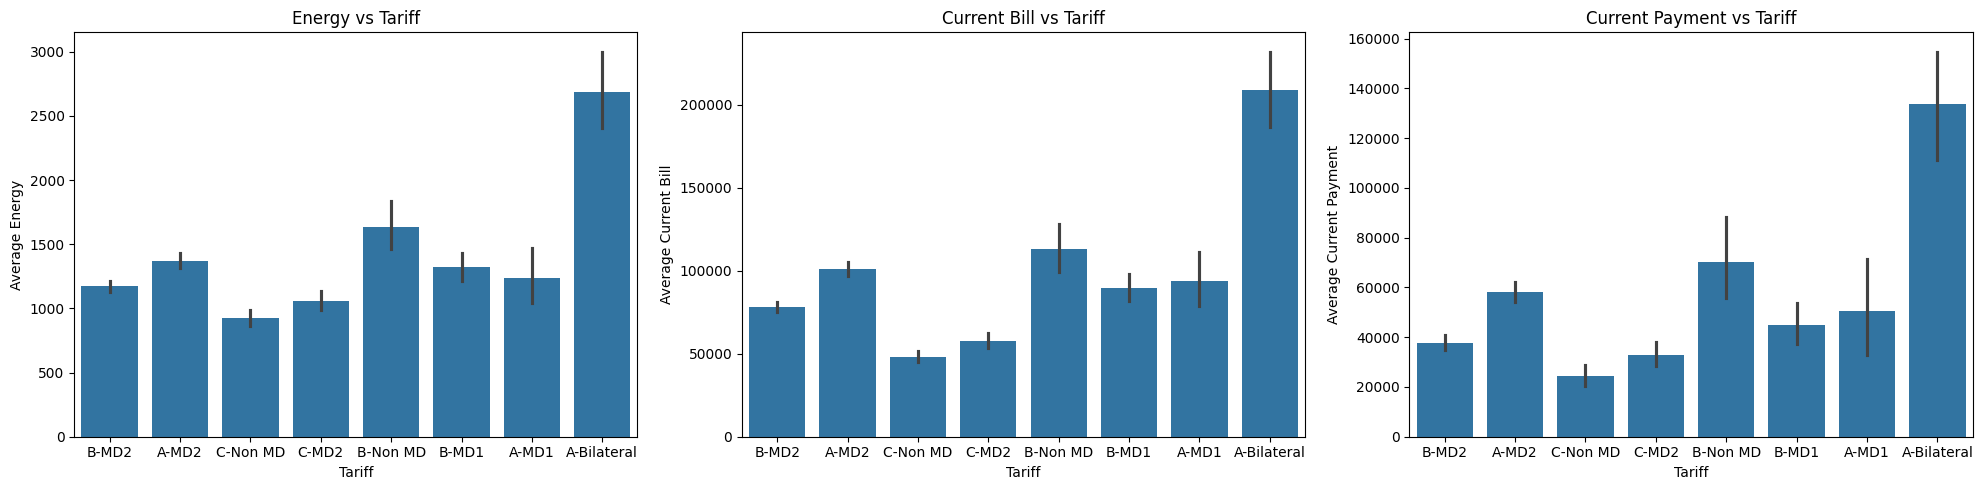

In [158]:
# Create the bar chart
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns of subplots

# Energy vs Tariff
sns.barplot(x='Tariff', y='Energy (kWh)', data=cluster_0_df, estimator='mean', ax=ax[0])
ax[0].set_title('Energy vs Tariff')
ax[0].set_xlabel('Tariff')
ax[0].set_ylabel('Average Energy')

# Current Bill vs Tariff
sns.barplot(x='Tariff', y='Current Bill', data=cluster_0_df, estimator='mean', ax=ax[1])
ax[1].set_title('Current Bill vs Tariff')
ax[1].set_xlabel('Tariff')
ax[1].set_ylabel('Average Current Bill')

# Current Payment vs Tariff
sns.barplot(x='Tariff', y='Current Payment', data=cluster_0_df, estimator='mean', ax=ax[2])
ax[2].set_title('Current Payment vs Tariff')
ax[2].set_xlabel('Tariff')
ax[2].set_ylabel('Average Current Payment')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Based on the above performance plot for cluster_0 (Group 0), the customwer mix are not similar to MD-KAM. Hence,that means majority of the customers under that cluster are not prioirity in terms of supply or availability (see pie chart plot).**

*  * Due to low supply they have inconsistent trend in energy consumption which is bad trend for energy growth.*
*  * The volume of their current bill shows that customer under this cluster have low paying capacity as seen in the inconsistent trend in the Barchart plot.*
*  * From the above plot on current payment(payment attitude) customers under this feeder are inconsistent with payment which is not good for the operation of the business.*


In [159]:
cluster_0_df.columns

Index(['Feeder No', 'Current Opening bal.', 'Current Billing Adjustment',
       'Current Payment', 'Energy (kWh)', 'Current Bill',
       'Current Closing bal.', 'CURRENT ACTIVE MONTH',
       'CURRENT NUM MONTHS NO PAYMENT CHECK ', 'CE O/S', 'month', 'Tariff'],
      dtype='object')

In [160]:
cluster_1_df.reset_index(inplace=True)

In [161]:
# 1. Extract the necessary mapping:
feeder_to_tariff = df_Electricity_Active.drop_duplicates(subset=['Feeder No']).set_index('Feeder No')['Tariff']

# 2. Add the 'Tariff' column to cluster_0_df:
cluster_1_df['Tariff'] = cluster_1_df['Feeder No'].map(feeder_to_tariff)

<ipython-input-161-02fdb1e3abc4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_df['Tariff'] = cluster_1_df['Feeder No'].map(feeder_to_tariff)


In [162]:
cluster_1_df

Feeder No  Current Opening bal.  Current Billing Adjustment  \
0      1081849.0             252274.69                         0.0   
1      1081849.0             204499.36                         0.0   
2      1069324.0             486259.19                         0.0   
3      1081849.0             114541.56                         0.0   
4      1069328.0             256620.93                         0.0   
...          ...                   ...                         ...   
11230  1070558.0             338057.99                         0.0   
11231  1070933.0            2578020.14                         0.0   
11232  1070558.0              97714.19                         0.0   
11233  1070945.0            5423169.81                         0.0   
11234  1091868.0                  0.00                         0.0   

       Current Payment  Energy (kWh)  Current Bill  Current Closing bal.  \
0            252500.00        3410.0     266976.57             266751.26   
1            204499.36        2810.0     220001.22             220001.22   
2                 0.00        1007.0      75506.12             561765.31   
3            114541.56        5086.0     398194.38             398194.38   
4             78000.00         629.0      49245.83             227866.76   
...                ...           ...           ...                   ...   
11230        338100.00         958.0      71832.04              71790.03   
11231         70000.00        2374.0     161213.00            2669233.14   
11232         97715.00         100.0       4868.68               4867.87   
11233         20000.00        1200.0      89680.80            5492850.61   
11234             0.00       14113.0    1098414.79            1098414.79   

       CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   CE O/S  \
0                      15.0                                   1.0   23.43   
1                      15.0                                   0.0    0.00   
2                      15.0                                   1.0  493.88   
3                      15.0                                   0.0    0.00   
4                      15.0                                   0.0    0.00   
...                     ...                                   ...     ...   
11230                  12.0                                   2.0    0.00   
11231                  12.0                                   0.0    0.00   
11232                  10.0                                   2.0  131.32   
11233                  12.0                                  10.0    0.00   
11234                   1.0                                   1.0    0.00   

       month       Tariff  
0        4.0        A-MD2  
1        4.0        A-MD2  
2        4.0        B-MD2  
3        4.0        A-MD2  
4        4.0        A-MD2  
...      ...          ...  
11230    1.0     B-Non MD  
11231    1.0        B-MD2  
11232    1.0     B-Non MD  
11233    1.0        A-MD2  
11234    1.0  A-Bilateral  

[11235 rows x 12 columns]

Tariff
A-Bilateral     969
A-MD1           171
A-MD2          3728
B-MD1           568
B-MD2          3509
B-Non MD        738
C-MD2           977
C-Non MD        575
Name: count, dtype: int64


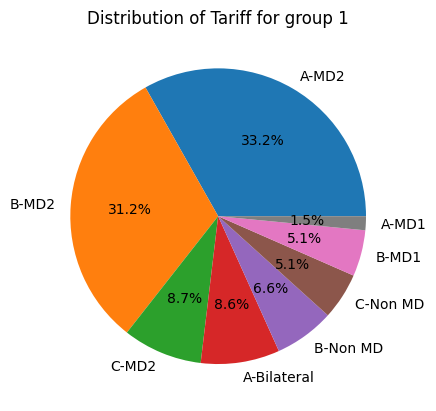

In [163]:
print(cluster_1_df['Tariff'].value_counts().sort_index())
cluster_1_df['Tariff'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Tariff for group 1')
plt.ylabel('')  # Hide the y-axis label for pie charts
plt.show()

In [164]:
# Create the bar chart
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns of subplots

# Energy vs Tariff
sns.barplot(x='Tariff', y='Energy (kWh)', data=cluster_1_df, estimator='mean', ax=ax[0])
ax[0].set_title('Energy vs Tariff')
ax[0].set_xlabel('Tariff')
ax[0].set_ylabel('Average Energy')

# Current Bill vs Tariff
sns.barplot(x='Tariff', y='Current Bill', data=cluster_1_df, estimator='mean', ax=ax[1])
ax[1].set_title('Current Bill vs Tariff')
ax[1].set_xlabel('Tariff')
ax[1].set_ylabel('Average Current Bill')

# Current Payment vs Tariff
sns.barplot(x='Tariff', y='Current Payment', data=cluster_1_df, estimator='mean', ax=ax[2])
ax[2].set_title('Current Payment vs Tariff')
ax[2].set_xlabel('Tariff')
ax[2].set_ylabel('Average Current Payment')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Based on the above performance plot for cluster_1 (Group 1), the customwer mix are not similar to MD-KAM. Hence,that means majority of the customers under that cluster are not prioirity in terms of supply or availability (see pie chart plot).**

*  * Due to low supply they have inconsistent trend in energy consumption which is bad trend for energy growth.*
*  * The volume of their current bill shows that customer under this cluster have low paying capacity as seen in the inconsistent trend in the Barchart plot.*
*  * From the above plot on current payment(payment attitude) customers under this feeder are inconsistent with payment which is not good for the operation of the business.*

In [165]:
cluster_2_df.reset_index(inplace=True)
# 1. Extract the necessary mapping:
feeder_to_tariff = df_Electricity_Active.drop_duplicates(subset=['Feeder No']).set_index('Feeder No')['Tariff']

# 2. Add the 'Tariff' column to cluster_0_df:
cluster_2_df['Tariff'] = cluster_2_df['Feeder No'].map(feeder_to_tariff)

<ipython-input-165-e6c59313eb74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_df['Tariff'] = cluster_2_df['Feeder No'].map(feeder_to_tariff)


In [166]:
cluster_2_df

Feeder No  Current Opening bal.  Current Billing Adjustment  \
0     1079545.0            1295975.93                         0.0   
1     1079545.0            1388877.69                         0.0   
2     1079534.0            1529517.40                         0.0   
3     1172349.0            1138215.38                         0.0   
4     1064340.0            3104563.47                         0.0   
...         ...                   ...                         ...   
1711  1079580.0            4549253.70                         0.0   
1712  1070558.0              58278.84                         0.0   
1713  1070558.0             460763.69                         0.0   
1714  1070558.0            4558184.17                         0.0   
1715  1070941.0                  0.00                         0.0   

      Current Payment  Energy (kWh)  Current Bill  Current Closing bal.  \
0          1295975.73       20721.0    1553686.48            1553686.68   
1          1388877.69       14276.0    1070432.33            1070432.33   
2          1579517.40       11200.0     876873.20             826873.20   
3          1138215.38       13410.0    1005498.56            1005498.56   
4          3269013.00       37956.0    2971660.64            2807211.11   
...               ...           ...           ...                   ...   
1711        500000.00       11139.0     872097.37            4921351.07   
1712         58700.00       18468.0    1384753.73            1384332.57   
1713        460000.00       15838.0    1187553.04            1188316.73   
1714        462000.00       19209.0    1440314.83            5536499.00   
1715             0.00       26950.0    2097518.50            2097518.50   

      CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   CE O/S  \
0                     15.0                                   0.0     0.2   
1                     15.0                                   0.0     0.0   
2                      6.0                                   7.0     0.0   
3                     15.0                                   0.0     0.0   
4                     15.0                                   1.0     0.0   
...                    ...                                   ...     ...   
1711                  12.0                                   3.0     0.0   
1712                   8.0                                   7.0     0.0   
1713                  12.0                                   1.0     0.0   
1714                  12.0                                   3.0     0.0   
1715                   1.0                                   1.0     0.0   

      month       Tariff  
0       4.0        B-MD2  
1       4.0        B-MD2  
2       4.0        A-MD2  
3       4.0        B-MD2  
4       4.0        A-MD2  
...     ...          ...  
1711    1.0  A-Bilateral  
1712    1.0     B-Non MD  
1713    1.0     B-Non MD  
1714    1.0     B-Non MD  
1715    1.0  A-Bilateral  

[1716 rows x 12 columns]

Tariff
A-Bilateral    574
A-MD1           26
A-MD2          697
B-MD1           77
B-MD2          254
B-Non MD        37
C-MD2           51
Name: count, dtype: int64


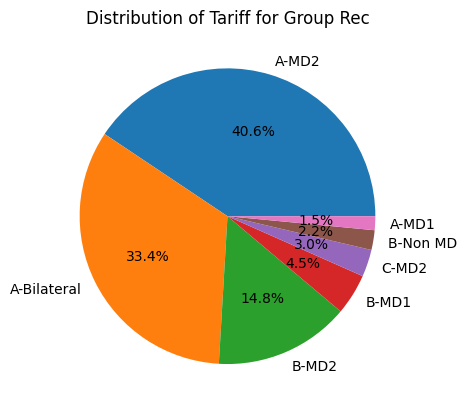

In [167]:
print(cluster_2_df['Tariff'].value_counts().sort_index())
cluster_2_df['Tariff'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Tariff for Group Rec')
plt.ylabel('')  # Hide the y-axis label for pie charts
plt.show()

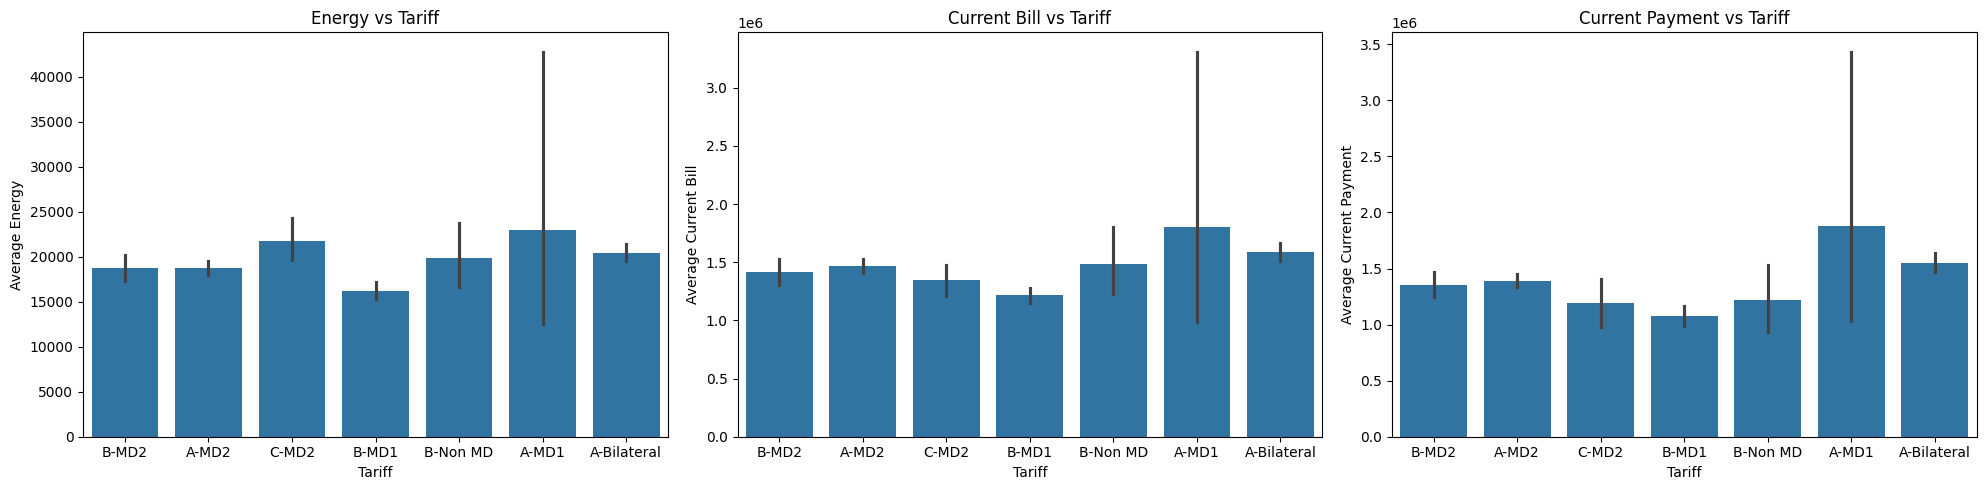

In [168]:
# Create the bar chart
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns of subplots

# Energy vs Tariff
sns.barplot(x='Tariff', y='Energy (kWh)', data=cluster_2_df, estimator='mean', ax=ax[0])
ax[0].set_title('Energy vs Tariff')
ax[0].set_xlabel('Tariff')
ax[0].set_ylabel('Average Energy')

# Current Bill vs Tariff
sns.barplot(x='Tariff', y='Current Bill', data=cluster_2_df, estimator='mean', ax=ax[1])
ax[1].set_title('Current Bill vs Tariff')
ax[1].set_xlabel('Tariff')
ax[1].set_ylabel('Average Current Bill')

# Current Payment vs Tariff
sns.barplot(x='Tariff', y='Current Payment', data=cluster_2_df, estimator='mean', ax=ax[2])
ax[2].set_title('Current Payment vs Tariff')
ax[2].set_xlabel('Tariff')
ax[2].set_ylabel('Average Current Payment')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Based on the above performance plot for cluster_2 (Group Rec), the customwer mix are similar to MD-KAM. Hence, (see pie chart plot).**

*  * They have shown consistent trend in energy consumption which is a good trend for energy growth.*
*  * The volume of their current bill shows that customer under this cluster have good payment capacity as seen in the consistent trend in the Barchart plot.*
*  * From the above plot on current payment(payment attitude) customers under this cluster are consistent with payment which is good for the operation of the business and cashflow.*

In [169]:
cluster_3_df.reset_index(inplace=True)
# 1. Extract the necessary mapping:
feeder_to_tariff = df_Electricity_Active.drop_duplicates(subset=['Feeder No']).set_index('Feeder No')['Tariff']

# 2. Add the 'Tariff' column to cluster_0_df:
cluster_3_df['Tariff'] = cluster_3_df['Feeder No'].map(feeder_to_tariff)

<ipython-input-169-302ae74f6029>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_df['Tariff'] = cluster_3_df['Feeder No'].map(feeder_to_tariff)


In [170]:
cluster_3_df

Feeder No  Current Opening bal.  Current Billing Adjustment  \
0   1064344.0           81223203.32                         0.0   
1   1070725.0           49057187.66                         0.0   
2   1064344.0           81703248.65                         0.0   
3   1064344.0           81359380.93                         0.0   
4   1070725.0           52662500.51                         0.0   
5   1064344.0           80990645.85                         0.0   
6   1070725.0           51007939.38                         0.0   
7   1064344.0           80861593.31                         0.0   
8   1070725.0           49550844.15                         0.0   
9   1064344.0           80812709.78                         0.0   
10  1064344.0           82016371.96                         0.0   
11  1070725.0           48760773.20                         0.0   

    Current Payment  Energy (kWh)  Current Bill  Current Closing bal.  \
0         1378000.0       12982.0    1016389.99           80861593.31   
1          450000.0       12053.0     943656.49           49550844.15   
2         1260000.0        4719.0     369461.13           80812709.78   
3         1050000.0       11021.0     862858.89           81172239.82   
4         2450000.0       28265.0    2212930.45           52425430.96   
5         1270000.0       20931.0    1638735.08           81359380.93   
6          700000.0       30074.0    2354561.13           52662500.51   
7         1000000.0       14421.0    1129052.54           80990645.85   
8          950000.0       30745.0    2407095.23           51007939.38   
9          669000.0       13788.0    1079493.54           81223203.32   
10        1177000.0       11034.0     863876.69           81703248.65   
11              0.0        3786.0     296414.46           49057187.66   

    CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK      CE O/S  \
0                    6.0                                  12.0       0.00   
1                    2.0                                   5.0    6343.51   
2                    4.0                                  12.0  299538.87   
3                    9.0                                  12.0  187141.11   
4                    5.0                                   5.0       0.00   
5                    8.0                                  12.0       0.00   
6                    4.0                                   5.0   95438.87   
7                    7.0                                  12.0       0.00   
8                    3.0                                   6.0       0.00   
9                    5.0                                  12.0  298506.46   
10                   3.0                                  12.0  396123.31   
11                  12.0                                   3.0       0.00   

    month Tariff  
0     4.0  A-MD2  
1     4.0  A-MD2  
2     2.0  A-MD2  
3     7.0  A-MD2  
4     7.0  A-MD2  
5     6.0  A-MD2  
6     6.0  A-MD2  
7     5.0  A-MD2  
8     5.0  A-MD2  
9     3.0  A-MD2  
10    1.0  A-MD2  
11    1.0  A-MD2

Tariff
A-MD2    12
Name: count, dtype: int64


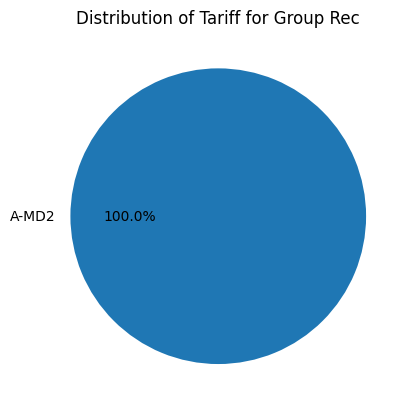

In [171]:
print(cluster_3_df['Tariff'].value_counts().sort_index())
cluster_3_df['Tariff'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Tariff for Group Rec')
plt.ylabel('')  # Hide the y-axis label for pie charts
plt.show()

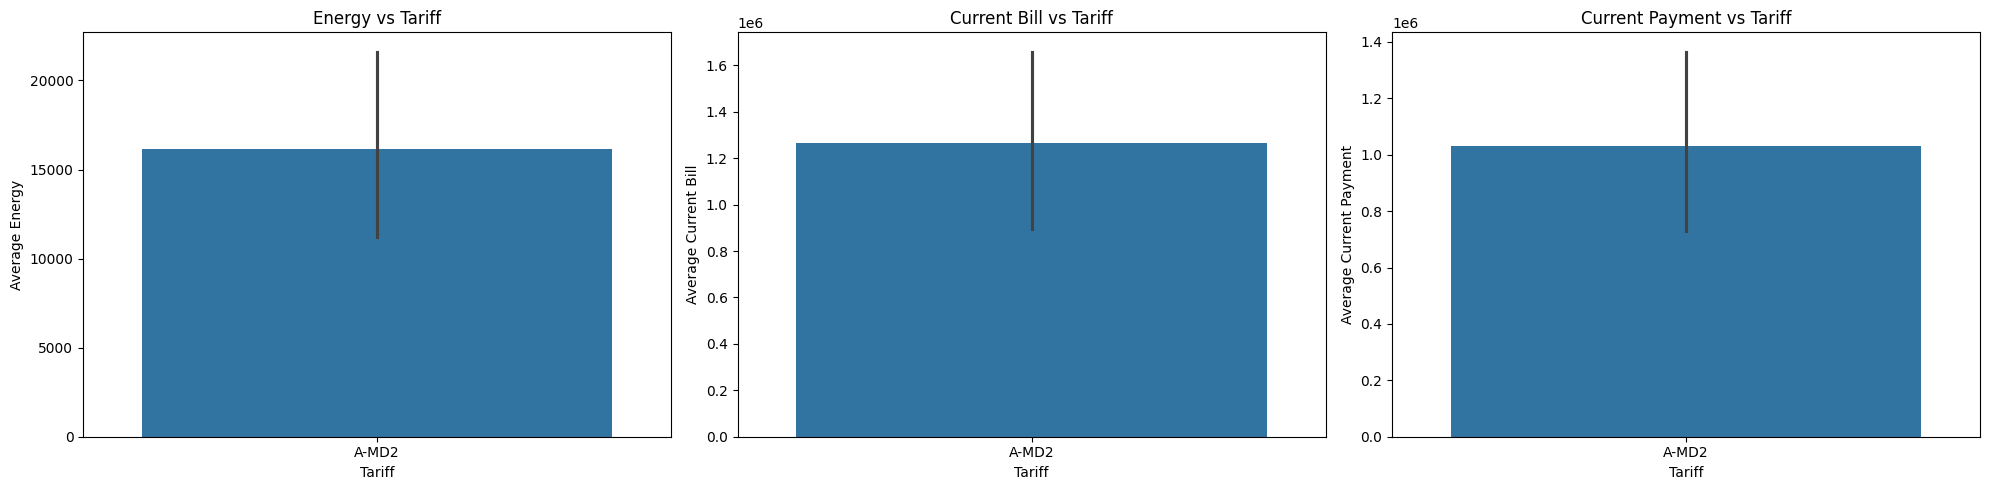

In [172]:
# Create the bar chart
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns of subplots

# Energy vs Tariff
sns.barplot(x='Tariff', y='Energy (kWh)', data=cluster_3_df, estimator='mean', ax=ax[0])
ax[0].set_title('Energy vs Tariff')
ax[0].set_xlabel('Tariff')
ax[0].set_ylabel('Average Energy')

# Current Bill vs Tariff
sns.barplot(x='Tariff', y='Current Bill', data=cluster_3_df, estimator='mean', ax=ax[1])
ax[1].set_title('Current Bill vs Tariff')
ax[1].set_xlabel('Tariff')
ax[1].set_ylabel('Average Current Bill')

# Current Payment vs Tariff
sns.barplot(x='Tariff', y='Current Payment', data=cluster_3_df, estimator='mean', ax=ax[2])
ax[2].set_title('Current Payment vs Tariff')
ax[2].set_xlabel('Tariff')
ax[2].set_ylabel('Average Current Payment')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Based on the above performance plot for cluster_3 (Group Rec), the customwer mix are similar to MD-KAM. Hence, (see pie chart plot).**

*  * They have shown consistent trend in energy consumption which is a good trend for energy growth.*
*  * The volume of their current bill shows that customer under this cluster have good payment capacity as seen in the consistent trend in the Barchart plot.*
*  * From the above plot on current payment(payment attitude) customers under this cluster are consistent with payment which is good for the operation of the business and cashflow.*

In [173]:
df_Electricity_Active_new_cus_mdkam

Account Type 2  Current Opening bal.  Current Billing Adjustment  \
50            MD-KAM             354850.17                  -376037.68   
109           MD-KAM            6638315.01                        0.00   
137           MD-KAM            3892426.65                        0.00   
138           MD-KAM            4003248.94                        0.00   
139           MD-KAM            1475031.15                        0.00   
...              ...                   ...                         ...   
65337         MD-KAM            1653223.65                        0.00   
65338         MD-KAM            4255817.90                        0.00   
65339         MD-KAM            6643775.55                        0.00   
65340         MD-KAM            2281511.34                        0.00   
65341         MD-KAM            6483943.44                        0.00   

       Current Payment  Energy (kWh)  Vat charge (₦)  Current Bill  \
50                0.00          2553        13945.12     199880.11   
109         6638315.01         64712       338524.65    4852186.65   
137         3892426.65         24072       125926.65    1804948.65   
138         4003248.94         38795       202946.34    2908897.59   
139         1475031.15         19732       103223.03    1479530.03   
...                ...           ...             ...           ...   
65337       1653233.65         23198       125965.14    1805500.34   
65338       4255817.90         61266       332674.38    4768332.78   
65339       6643775.55         85676       465220.68    6668163.08   
65340       2281511.34         32195       174818.85    2505736.85   
65341       3241225.04         15378        83998.48    1203978.22   

       Actual Current Bill  Current Closing bal.  Actual Closing bal.  \
50                    0.00             178692.60            178692.60   
109             4852186.65            4852186.65           4852186.65   
137             1804948.65            1804948.65           1804948.65   
138             2908897.59            2908897.59           2908897.59   
139             1479530.03            1479530.03           1479530.03   
...                    ...                   ...                  ...   
65337           1805500.34            1805490.34           1805490.34   
65338           4768332.78            4768332.78           4768332.78   
65339           6668163.08            6668163.08           6668163.08   
65340           2505736.85            2505736.85           2505736.85   
65341           1203978.22            4446696.62           4446696.62   

       Feeder No  CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   \
50     1079493.0                    15                                    17   
109    1079545.0                    15                                     1   
137    1079545.0                    15                                     0   
138    1079545.0                    15                                     0   
139    1079545.0                    15                                     0   
...          ...                   ...                                   ...   
65337  1091868.0                    12                                     0   
65338  1070562.0                    12                                     0   
65339  1070937.0                    12                                     0   
65340  1091868.0                    12                                     0   
65341  1079564.0                    12                                     4   

        CE O/S  year  month  
50         0.0  2023      4  
109        0.0  2023      4  
137        0.0  2023      4  
138        0.0  2023      4  
139    98965.7  2023      4  
...        ...   ...    ...  
65337      0.0  2023      1  
65338      0.0  2023      1  
65339      0.0  2023      1  
65340      0.0  2023      1  
65341      0.0  2023      1  

[2218 rows x 16 columns]

In [174]:
# 1. Extract the necessary mapping:
feeder_to_tariff = df_Electricity_Active.drop_duplicates(subset=['Feeder No']).set_index('Feeder No')['Tariff']

# 2. Add the 'Tariff' column to cluster_0_df:
df_Electricity_Active_new_cus_mdkam['Tariff'] = df_Electricity_Active_new_cus_mdkam['Feeder No'].map(feeder_to_tariff)

<ipython-input-174-16e194f8ca0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Electricity_Active_new_cus_mdkam['Tariff'] = df_Electricity_Active_new_cus_mdkam['Feeder No'].map(feeder_to_tariff)


In [175]:
df_Electricity_Active_new_cus_mdkam.head()

Account Type 2  Current Opening bal.  Current Billing Adjustment  \
50          MD-KAM             354850.17                  -376037.68   
109         MD-KAM            6638315.01                        0.00   
137         MD-KAM            3892426.65                        0.00   
138         MD-KAM            4003248.94                        0.00   
139         MD-KAM            1475031.15                        0.00   

     Current Payment  Energy (kWh)  Vat charge (₦)  Current Bill  \
50              0.00          2553        13945.12     199880.11   
109       6638315.01         64712       338524.65    4852186.65   
137       3892426.65         24072       125926.65    1804948.65   
138       4003248.94         38795       202946.34    2908897.59   
139       1475031.15         19732       103223.03    1479530.03   

     Actual Current Bill  Current Closing bal.  Actual Closing bal.  \
50                  0.00             178692.60            178692.60   
109           4852186.65            4852186.65           4852186.65   
137           1804948.65            1804948.65           1804948.65   
138           2908897.59            2908897.59           2908897.59   
139           1479530.03            1479530.03           1479530.03   

     Feeder No  CURRENT ACTIVE MONTH  CURRENT NUM MONTHS NO PAYMENT CHECK   \
50   1079493.0                    15                                    17   
109  1079545.0                    15                                     1   
137  1079545.0                    15                                     0   
138  1079545.0                    15                                     0   
139  1079545.0                    15                                     0   

      CE O/S  year  month Tariff  
50       0.0  2023      4  A-MD2  
109      0.0  2023      4  B-MD2  
137      0.0  2023      4  B-MD2  
138      0.0  2023      4  B-MD2  
139  98965.7  2023      4  B-MD2

**MD-KAM PERFORMANCE PLOT ON ENERGY CONSUMPTION, CURRENT PAYMENT AND CURRENT BILL**

Tariff
A-Bilateral     554
A-MD1            75
A-MD2          1055
B-MD1           112
B-MD2           319
B-Non MD         76
C-MD2            20
E-MD2             7
Name: count, dtype: int64


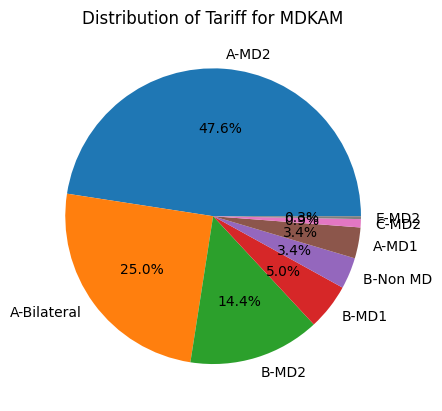

In [176]:
print(df_Electricity_Active_new_cus_mdkam['Tariff'].value_counts().sort_index())
df_Electricity_Active_new_cus_mdkam['Tariff'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Tariff for MDKAM')
plt.ylabel('')  # Hide the y-axis label for pie charts
plt.show()

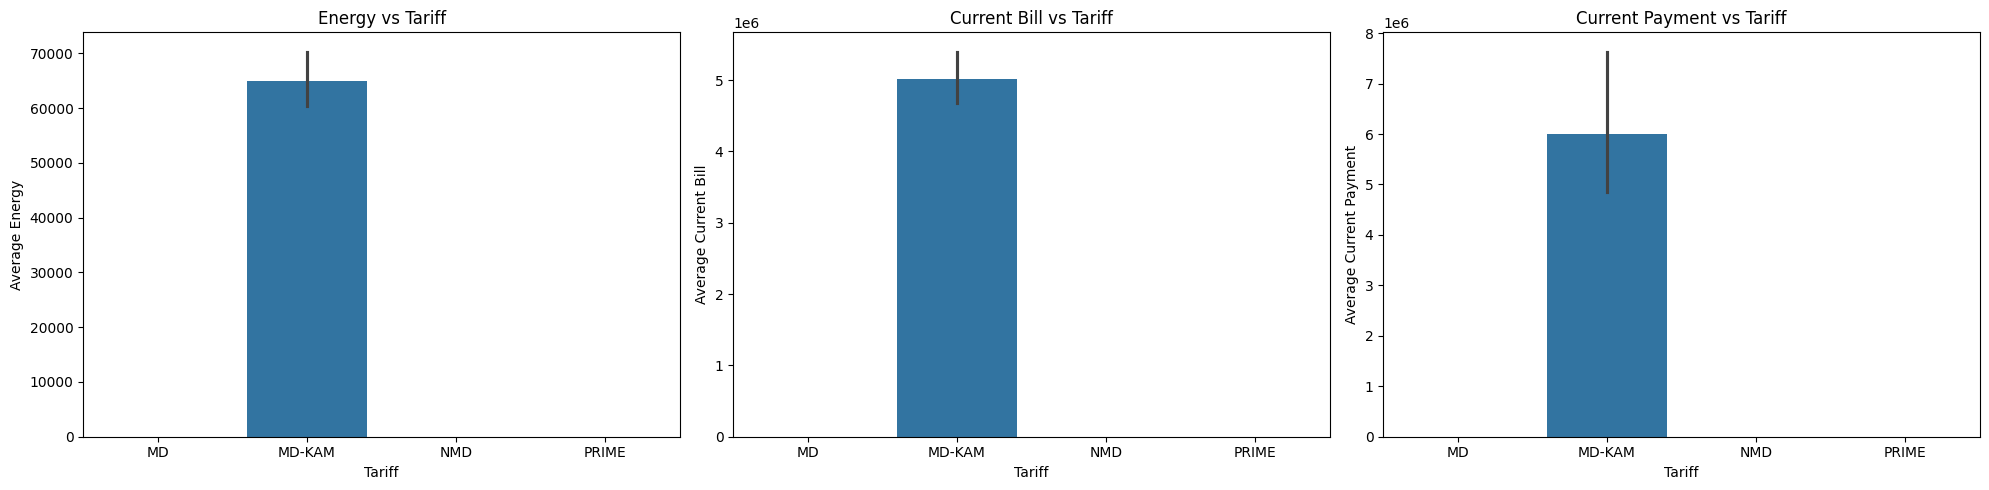

In [177]:
# Create the bar chart
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns of subplots

# Energy vs Tariff
sns.barplot(x='Account Type 2', y='Energy (kWh)', data=df_Electricity_Active_new_cus_mdkam, estimator='mean', ax=ax[0])
ax[0].set_title('Energy vs Tariff')
ax[0].set_xlabel('Tariff')
ax[0].set_ylabel('Average Energy')

# Current Bill vs Tariff
sns.barplot(x='Account Type 2', y='Current Bill', data=df_Electricity_Active_new_cus_mdkam, estimator='mean', ax=ax[1])
ax[1].set_title('Current Bill vs Tariff')
ax[1].set_xlabel('Tariff')
ax[1].set_ylabel('Average Current Bill')

# Current Payment vs Tariff
sns.barplot(x='Account Type 2', y='Current Payment', data=df_Electricity_Active_new_cus_mdkam, estimator='mean', ax=ax[2])
ax[2].set_title('Current Payment vs Tariff')
ax[2].set_xlabel('Tariff')
ax[2].set_ylabel('Average Current Payment')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In conclusion, the two cluster called **"Group Rec"** appears to have shown similar performance to MD-KAM accross all the listed performance indicies.

**For resources allocation :** Areas under the feeder categorized as group Rec will be recommended to business for effective resources allocation interms of investiment. The data above suggests assurance of return on investment.

**Group Rec :** High Energy consumers with average 89.0% (high) respone to Bill
The above attribute suggest potential to take more energy, hence energy growth and consistentcy with payment on current bill (liquidity of the business)